# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Preface

1. Reading data.


2. Splitting data.


3. Preprocessing.


    3.1. Preprocessing of Project_subject_categories
    
        3.1.1. On X_train
        3.1.2. On X_cv
        3.1.3. On X_test
        
    3.2. Preprocessing of Project_subject_subcategories
    
        3.2.1. On X_train
        3.2.2. On X_cv
        3.2.3. On X_test

4. Text Preprocessing

    4.1. Preprocessing of Project_Essays
    
        4.1.1. On X_train
        4.1.2. On X_cv
        4.1.3. On X_test
        
    4.4. Preprocessing of Project_Titles
    
        4.2.1. On X_train
        4.2.2. On X_cv
        4.2.3. On X_test

5. Preparing Data for models

    5.1. Vectorizing the categorical data.
    
        5.1.1. School State.
        
        5.1.2. Teacher Preifx.
        
        5.1.3. Project grade category
        
        5.1.4. Clean Categories(subject categories)
        
        5.1.5. Clean Sub_categories(subject sub_categories)
        
    5.2 Normalizing the Numerical features.
    
        5.2.1. Price.
        
        5.2.2. Teachers Previously Posted.
        
6. Vectorizing the Text data.

    6.1. BoW
    
        6.1.1. BoW on Preprocessed Essays
        
        6.1.2. BoW on Preprocessed Titles
        
    6.2. TFIDF 
    
        6.2.1. TFIDF on Preprocessed Essays
        
        6.2.2. TFIDF on Preprocessed Titles
        
    6.3. AVG W2V 
    
        6.3.1. AVG W2V on Preprocessed Essays.
        
            6.3.1.1. X_train
            6.3.1.2. X_cv
            6.3.1.3. X_Test
            
        6.3.2. AVG W2V on Preprocessed Titles.
        
            6.3.2.1. X_train
            6.3.2.2. X_cv
            6.3.2.3. X_test
            
    6.4. TFIDF weighted W2v
    
        6.4.1. TFIDF_W2V on Preprocessed Essays
        
            6.4.1.1. X_train
            6.4.1.2. X_cv
            6.4.1.3. X_Test
            
        6.4.2. TFIDF_W2V on Preprocessed Titles   
        
            6.4.2.1. X_train
            6.4.2.2. X_cv
            6.4.2.3. X_Test
            
            
7. Merging.

    7.1. Merging w.r.t BoW.
    
    7.2. Merging w.r.t TFIDF.
    
    7.3. Merging w.r.t AVG_W2V.
    
    7.4. Merging w.r.t TFIDF_W2V.
    
    
8. Applying Logistic Regression

    8.1. Applying Linear SVM on BoW, Set-1.
    
        8.1.1. Linear SVM on BoW using l2 Regularization
        
        8.1.2. Linear SVM on BoW using l1 Regularization
    
    8.2. Applying Linear SVM on TFIDF, Set-2.
    
        8.2.1. Linear SVM on TFIDF using l2 Regularization
        
        8.2.2. Linear SVM on TFIDF using l1 Regularizatio
    
    8.3. Applying Linear SVM on AVG_W2V, Set-3
    
        8.3.1. Linear SVM on AVG_W2V using l2 Regularization
    
        8.3.2. Linear SVM on AVG_W2V using l1 Regularization
        
    8.4. Applying Linear SVM on TFIDF_W2V, Set-4
    
        8.4.1. Linear SVM on TFIDF_W2V using l2 Regularization
        
        8.4.1. Linear SVM on TFIDF_W2V using l1 Regularization
    
9. Colclusions.


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

F:\Newfolder\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
F:\Newfolder\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1. Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
resource_data["price"].head(5)

0    149.00
1     14.95
2      8.45
3     13.59
4     24.95
Name: price, dtype: float64

In [7]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [8]:
print(price_data.columns.values)

['id' 'price' 'quantity']


In [9]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [10]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects   price  quantity  
0                                            53  725.05         4  
1                                             4  213.03         8

In [11]:
print(project_data['project_grade_category'].unique())

['Grades PreK-2' 'Grades 3-5' 'Grades 9-12' 'Grades 6-8']


In [12]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-","_")
        
    project_grade_category.append(a)

In [13]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [14]:
project_data["project_grade_category"] = project_grade_category

In [15]:
(project_data['project_grade_category'].unique())

array(['Grades_PreK_2', 'Grades_3_5', 'Grades_9_12', 'Grades_6_8'],
      dtype=object)

In [16]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('none')

In [17]:
X = project_data

##  2. Splitting Data

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [19]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category'], dtype=object)

In [20]:
# merge two column text dataframe: 
X_train["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [21]:
X_train.drop(['project_essay_1'], axis=1, inplace=True)
X_train.drop(['project_essay_2'], axis=1, inplace=True)
X_train.drop(['project_essay_3'], axis=1, inplace=True)
X_train.drop(['project_essay_4'], axis=1, inplace=True)

In [22]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [23]:
# merge two column text dataframe: 
X_cv["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [24]:

X_cv.drop(['project_essay_1'], axis=1, inplace=True)
X_cv.drop(['project_essay_2'], axis=1, inplace=True)
X_cv.drop(['project_essay_3'], axis=1, inplace=True)
X_cv.drop(['project_essay_4'], axis=1, inplace=True)

In [25]:
X_cv.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

In [26]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [27]:
X_test.drop(['project_essay_1'], axis=1, inplace=True)
X_test.drop(['project_essay_2'], axis=1, inplace=True)
X_test.drop(['project_essay_3'], axis=1, inplace=True)
X_test.drop(['project_essay_4'], axis=1, inplace=True)

In [28]:
X_test.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories',
       'project_subject_subcategories', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay'], dtype=object)

## 3. Preprocessing

### 3.1 preprocessing of `project_subject_categories`

### 3.1.1  On X_train

In [29]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_train_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### 3.1.2 On X_cv

In [30]:
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_cv_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 3.1.3 On X_test

In [31]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_cv['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
X_test_sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 3.2 preprocessing of `project_subject_subcategories`

### 3.2.1 On X_train

In [32]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_train_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_cv

In [33]:
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_cv_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 3.2.2 On X_test

In [34]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
X_test_sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 4. Text preprocessing

In [35]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
66513       41054  p032695  b82f39f23254438dd80fa42587ae625c            Ms.   
58282      114438  p107154  766ae456e4808158a55e83c870ec29d8            Mr.   

      school_state                Date  \
66513           IN 2016-11-13 14:25:27   
58282           PA 2016-10-11 12:48:18   

                                      project_title  \
66513        Listening is the Key to Understanding!   
58282  Mr. Brill's Longstreth Elementary Music Room   

                                project_resource_summary  \
66513  My students need are in need of a listening ce...   
58282  My students need to have hands on music experi...   

       teacher_number_of_previously_posted_projects   price  quantity  \
66513                                             0  212.46         1   
58282                                             0  203.96        13   

      project_grade_category  \
66513          Grades_PreK_2   
58282             Grades_3_5   

                                                   essay   clean_categories  \
66513  As a teacher in a high poverty/low-income scho...  Literacy_Language   
58282  My students come from very diverse backgrounds...         Music_Arts   

      clean_subcategories  
66513            Literacy  
58282               Music

In [36]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [37]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [38]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

My 8th grade students are really amazing. They are comprised of Sheltered, English only, Reclassified ELL, Read 180 and Gate students.  They are from different parts of the world with different cultures, attitude and values towards education and learning.\r\nMy students are from from low income families. My students are faced with many life challenges. Many of them are raised in a foster care homes.\r\n My school is a title 1 school with most of the students on free breakfast and reduced lunch.\r\nI believe that every child has the potential to learn and succeed. But sometimes inadequate essential learning tools may slow down success. The printer and ink will be very helpful as my students can print research materials and completed projects and journal articles. This will motivate them to explore, research and work on any project and journal articles giving by me or other teachers.\r\n Most of my students do not have printer at home to print their research works or to print out materia

In [39]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My 8th grade students are really amazing They are comprised of Sheltered English only Reclassified ELL Read 180 and Gate students They are from different parts of the world with different cultures attitude and values towards education and learning r nMy students are from from low income families My students are faced with many life challenges Many of them are raised in a foster care homes r n My school is a title 1 school with most of the students on free breakfast and reduced lunch r nI believe that every child has the potential to learn and succeed But sometimes inadequate essential learning tools may slow down success The printer and ink will be very helpful as my students can print research materials and completed projects and journal articles This will motivate them to explore research and work on any project and journal articles giving by me or other teachers r n Most of my students do not have printer at home to print their research works or to print out materials needed to do t

In [40]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

<h2><font color='red'> 4.1 Preprocessing of `project_essays`</font></h2>

###  4.1.1 On X_train

In [41]:
# Combining all the above stundents 
from tqdm import tqdm
X_train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:47<00:00, 1037.23it/s]


In [42]:
# after preprocesing
X_train_preprocessed_essays[2000]

'amazing eighth grade students live staten island ny school high poverty school leadership technology number one priority would love provide students learning environment meet needs students class full energy eager learn however many students find difficult sit still traditional desk 80 plus minutes flexible seating give choice learn best flexible seating provide students learning environment need deserve want remove uncomfortable metal desks chairs classroom replace variety colorful comfortable seating alternatives looking donations help purchase wobble chairs stools balance balls bean bag chairs studies show implementing flexible classrooms help improve grades student engagement student centered conversations also health benefits result flexible seating students active sit wobble chair balance ball moving around helps students use excess energy increase motivation boost performance nannan'

### 4.1.1.1 Word_count in X_train Project_Essays

In [43]:
Q = X_train_preprocessed_essays.copy()

In [44]:
Word_count_X_train_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_Essays.append(n)

In [45]:
print(Word_count_X_train_Essays[2000])
print(len(Word_count_X_train_Essays))

120
49041


In [46]:
Word_count_X_train_Essays = np.asarray(Word_count_X_train_Essays)
print(Word_count_X_train_Essays.shape)

(49041,)


### 4.1.1.2 Sentiment_analysis on X_train Project_Essays

In [47]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\B511
[nltk_data]     I7\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
Q = X_train_preprocessed_essays.copy()

In [49]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_train_Essays = []
Negative_X_train_Essays = []
Neutral_X_train_Essays = []
Compound_X_train_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_train_Essays.append(n1)
    Negative_X_train_Essays.append(n2)
    Neutral_X_train_Essays.append(n3)
    Compound_X_train_Essays.append(n4)
    


F:\Newfolder\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████| 49041/49041 [11:02<00:00, 74.06it/s] 


In [50]:
print(Positive_X_train_Essays[20000])
print(Negative_X_train_Essays[20000])
print(Neutral_X_train_Essays[20000])
print(Compound_X_train_Essays[20000])

0.031
0.228
0.741
0.9817


In [51]:
Positive_X_train_Essays = np.asarray(Positive_X_train_Essays)
Negative_X_train_Essays = np.asarray(Negative_X_train_Essays)
Neutral_X_train_Essays = np.asarray(Neutral_X_train_Essays)
Compound_X_train_Essays = np.asarray(Compound_X_train_Essays)
print(Neutral_X_train_Essays.shape)

(49041,)


In [52]:
import numpy as np
Sentiment_X_train_Essays = np.column_stack((Positive_X_train_Essays,Negative_X_train_Essays,Neutral_X_train_Essays,Compound_X_train_Essays))
print(Sentiment_X_train_Essays.shape)

(49041, 4)


### 4.1.2 On X_cv

In [53]:
# Combining all the above stundents 
from tqdm import tqdm
X_cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:23<00:00, 1009.90it/s]


In [54]:
# after preprocesing
X_cv_preprocessed_essays[20000]

'excitement see students faces walk classroom walk immediately ask today students first classroom puts big emphasis science class science something might taught 2 3 times week 30 minutes time work class happy hands able move ability seats kids ones enjoy moving talking learning new things inspired scientists writers readers geologists designers next generation come students also face another challenge juggling two languages first time educational career taught science english expected communicate english students not adjusting learning facing multiple challenges classroom daily ever stuck meeting class day us adults hard sit one place long period time imagine like 10 11 year old providing students options seating able encourage movement still sparking learning child moves brain able think better providing options students sit allowing open brain carpet squares exercise balls resistance bands existing chairs provide comfortable environment promote movement translated learning nannan'

### 4.1.2.1 Word_count in X_cv Project_Essays

In [55]:
Q = X_cv_preprocessed_essays.copy()

In [56]:
Word_count_X_cv_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_Essays.append(n)

In [57]:
print(Word_count_X_cv_Essays[20000])
print(len(Word_count_X_cv_Essays))

140
24155


In [58]:
Word_count_X_cv_Essays = np.asarray(Word_count_X_cv_Essays)
print(Word_count_X_cv_Essays.shape)

(24155,)


### 4.1.2.2 Sentiment_analysis on X_cv Project_Essays

In [59]:
Q = X_cv_preprocessed_essays.copy()

In [60]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_cv_Essays = []
Negative_X_cv_Essays = []
Neutral_X_cv_Essays = []
Compound_X_cv_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_cv_Essays.append(n1)
    Negative_X_cv_Essays.append(n2)
    Neutral_X_cv_Essays.append(n3)
    Compound_X_cv_Essays.append(n4)

100%|██████████| 24155/24155 [04:55<00:00, 81.62it/s] 


In [61]:
print(Positive_X_cv_Essays[20000])
print(Negative_X_cv_Essays[20000])
print(Neutral_X_cv_Essays[20000])
print(Compound_X_cv_Essays[20000])

0.021
0.205
0.774
0.9806


In [62]:
Positive_X_cv_Essays = np.asarray(Positive_X_cv_Essays)
Negative_X_cv_Essays = np.asarray(Negative_X_cv_Essays)
Neutral_X_cv_Essays = np.asarray(Neutral_X_cv_Essays)
Compound_X_cv_Essays = np.asarray(Compound_X_cv_Essays)
print(Neutral_X_cv_Essays.shape)

(24155,)


In [63]:
import numpy as np
Sentiment_X_cv_Essays = np.column_stack((Positive_X_cv_Essays,Negative_X_cv_Essays,Neutral_X_cv_Essays,Compound_X_cv_Essays))
print(Sentiment_X_cv_Essays.shape)

(24155, 4)


###  4.1.3 On X_test

In [64]:
# merge two column text dataframe: 
X_test["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [65]:
# Combining all the above stundents 
from tqdm import tqdm
X_test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:26<00:00, 1363.48it/s]


### 4.1.3.1  Word_count in X_test Project_Essays

In [66]:
Q = X_test_preprocessed_essays.copy()

In [67]:
Word_count_X_test_Essays = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_Essays.append(n)

In [68]:
print(len(Word_count_X_test_Essays))

36052


In [69]:
Word_count_X_test_Essays = np.asarray(Word_count_X_test_Essays)
print(Word_count_X_test_Essays.shape)

(36052,)


### 4.1.2.3 Sentiment_analysis on X_test Project_Essays

In [70]:
Q = X_test_preprocessed_essays.copy()

In [71]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

cls = SentimentIntensityAnalyzer()

Positive_X_test_Essays = []
Negative_X_test_Essays = []
Neutral_X_test_Essays = []
Compound_X_test_Essays = []

for i in tqdm(Q):
    n1= cls.polarity_scores(i)["neg"]
    n2= cls.polarity_scores(i)["pos"]
    n3= cls.polarity_scores(i)["neu"]
    n4= cls.polarity_scores(i)["compound"]
    Positive_X_test_Essays.append(n1)
    Negative_X_test_Essays.append(n2)
    Neutral_X_test_Essays.append(n3)
    Compound_X_test_Essays.append(n4)

100%|██████████| 36052/36052 [07:47<00:00, 77.14it/s] 


In [72]:
Positive_X_test_Essays = np.asarray(Positive_X_test_Essays)
Negative_X_test_Essays = np.asarray(Negative_X_test_Essays)
Neutral_X_test_Essays = np.asarray(Neutral_X_test_Essays)
Compound_X_test_Essays = np.asarray(Compound_X_test_Essays)
print(Neutral_X_test_Essays.shape)

(36052,)


In [73]:
import numpy as np
Sentiment_X_test_Essays = np.column_stack((Positive_X_test_Essays,Negative_X_test_Essays,Neutral_X_test_Essays,Compound_X_test_Essays))
print(Sentiment_X_test_Essays.shape)

(36052, 4)


<h2><font color='red'> 4.2 Preprocessing of `project_title`</font></h2>

###  4.2.1 On X_train

In [74]:
# Combining all the above statemennts 
from tqdm import tqdm
X_train_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:02<00:00, 19862.25it/s]


In [75]:
X_train_preprocessed_project_titles[10000]

'help students research my classroom'

### 4.2.1.1 Word_count in X_train Project_titles

In [76]:
Q = X_train_preprocessed_project_titles.copy()

In [77]:
Word_count_X_train_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_train_titles.append(n)

In [78]:
print(Word_count_X_train_titles[10000])
Word_count_X_train_titles = np.asarray(Word_count_X_train_titles)
print(Word_count_X_train_titles.shape)

5
(49041,)


In [79]:
import numpy as np
Word_count_X_train_Essays_titles = np.column_stack((Word_count_X_train_Essays,Word_count_X_train_titles))
print(Word_count_X_train_Essays_titles.shape)

(49041, 2)


### 4.2.2 On X_cv

In [80]:
# Combining all the above statemennts 
from tqdm import tqdm
X_cv_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_cv_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:01<00:00, 20417.18it/s]


In [81]:
X_cv_preprocessed_project_titles[10000]

'phonics supplies needed k 5 special education esl students'

### 4.2.2.1 Word_count in X_cv Project_Titles

In [82]:
Q = X_cv_preprocessed_project_titles.copy()

In [83]:
Word_count_X_cv_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_cv_titles.append(n)

In [84]:
print(Word_count_X_cv_titles[10000])
Word_count_X_cv_titles = np.asarray(Word_count_X_cv_titles)
print(Word_count_X_cv_titles.shape)

9
(24155,)


In [85]:
import numpy as np
Word_count_X_cv_Essays_titles = np.column_stack((Word_count_X_cv_Essays,Word_count_X_cv_titles))
print(Word_count_X_cv_Essays_titles.shape)

(24155, 2)


### 4.2.3 On X_test

In [86]:
# Combining all the above statemennts 
from tqdm import tqdm
X_test_preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 21606.97it/s]


In [87]:
X_test_preprocessed_project_titles[10000]

'american history can be interesting'

### 4.2.2.1 Word_count in X_test Project_Titles

In [88]:
Q = X_test_preprocessed_project_titles.copy()

In [89]:
Word_count_X_test_titles = []

for i in Q:
    n = len(i.split())
    Word_count_X_test_titles.append(n)

In [90]:
print(Word_count_X_test_titles[10000])
Word_count_X_test_titles = np.asarray(Word_count_X_test_titles)
print(Word_count_X_test_titles.shape)

5
(36052,)


In [91]:
import numpy as np
Word_count_X_test_Essays_titles = np.column_stack((Word_count_X_test_Essays,Word_count_X_test_titles))
print(Word_count_X_test_Essays_titles.shape)

(36052, 2)


## 5 Preparing data for models

In [92]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'project_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 5.1 Vectorizing Categorical data

### 5.1.1 School State

In [93]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [94]:
# Using count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)

print(vectorizer.get_feature_names())
print(X_train_state_ohe.shape)
print(X_test_state_ohe.shape)
print(X_cv_state_ohe.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
(49041, 51)
(36052, 51)
(24155, 51)


### 5.1.2 Teacher Prefix

In [95]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer.get_feature_names())
print(X_train_teacher_ohe.shape)
print(X_test_teacher_ohe.shape)
print(X_cv_teacher_ohe.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
(49041, 5)
(36052, 5)
(24155, 5)


### 5.1.3 Project_grade_category

In [96]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)

print(vectorizer.get_feature_names())
print(X_train_grade_ohe.shape)
print(X_test_grade_ohe.shape)
print(X_cv_grade_ohe.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(49041, 4)
(36052, 4)
(24155, 4)


### 5.1.4  Clean Categories

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(X_train_sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)
X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names())

print(X_train_category_ohe.shape)
print(X_test_category_ohe.shape)
print(X_cv_category_ohe.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
(49041, 9)
(36052, 9)
(24155, 9)


### 5.1.5 Clean subcategories

In [98]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(X_train_sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)


print(vectorizer.get_feature_names())
print(X_train_subcategory_ohe.shape)
print(X_test_subcategory_ohe.shape)
print(X_cv_subcategory_ohe.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
(49041, 30)
(36052, 30)
(24155, 30)


### 5.2 Vectorizing the Numerical Features

### 5.2.1 Price

In [99]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
 
X_train_price_norm = (X_train_price_norm).T
X_cv_price_norm = (X_cv_price_norm).T
X_test_price_norm = (X_test_price_norm).T


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 5.2.2 Teacher no previously posted

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_no_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teacher_no_prev_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_no_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_no_prev_norm = (X_train_teacher_no_prev_norm).T
X_cv_teacher_no_prev_norm = (X_cv_teacher_no_prev_norm).T
X_test_teacher_no_prev_norm = (X_test_teacher_no_prev_norm).T
                                                                                               
print("After vectorizations")

print(X_train_teacher_no_prev_norm.shape, y_train.shape)
print(X_cv_teacher_no_prev_norm.shape, y_cv.shape)
print(X_test_teacher_no_prev_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 5.2.3 Quantity

In [101]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

X_train_quantity = (X_train_quantity).T
X_cv_quantity = (X_cv_quantity).T
X_test_quantity = (X_test_quantity).T

print("After vectorizations")
print(X_train_quantity.shape)
print(X_cv_quantity.shape)
print(X_test_quantity.shape)
print("="*100)

After vectorizations
(49041, 1)
(24155, 1)
(36052, 1)


In [102]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price',
       'quantity', 'project_grade_category', 'essay', 'clean_categories',
       'clean_subcategories'], dtype=object)

## 6. Vectorizing Text data

### 6.1 Bag of words (Bigrams with degree of freedom =10 & max_features =5000) 

### 6.1.1 BoW On Prepocessed Esssays

In [103]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10,max_features = 5000)
X_train_essay_text_bow = vectorizer.fit_transform(X_train_preprocessed_essays)
X_cv_essay_text_bow = vectorizer.transform(X_cv_preprocessed_essays)
X_test_essay_text_bow = vectorizer.transform(X_test_preprocessed_essays)

print("Shape of matrix after one hot encodig ",X_train_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_essay_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 5000)
Shape of matrix after one hot encodig  (24155, 5000)
Shape of matrix after one hot encodig  (36052, 5000)


### 6.1.2 BoW on Prepocessed titles

In [104]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(2,2),min_df=10, max_features =5000)
X_train_title_text_bow = vectorizer.fit_transform(X_train_preprocessed_project_titles)
X_cv_title_text_bow = vectorizer.transform(X_cv_preprocessed_project_titles)
X_test_title_text_bow = vectorizer.transform(X_test_preprocessed_project_titles)

print("Shape of matrix after one hot encodig ",X_train_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_title_text_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_title_text_bow.shape)

Shape of matrix after one hot encodig  (49041, 1666)
Shape of matrix after one hot encodig  (24155, 1666)
Shape of matrix after one hot encodig  (36052, 1666)


### 6.2 TFIDF vectorizer (Bigrams with degree of freedom =10 & max_features =5000)

### 6.2.1  Tfidf on prepocessed essays

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features =5000)
T_train_essay_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_essays)
T_cv_essay_text_tfidf = vectorizer.transform(X_cv_preprocessed_essays)
T_test_essay_text_tfidf = vectorizer.transform(X_test_preprocessed_essays)

print("Shape of matrix after one hot encodig ",T_train_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_essay_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_essay_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 5000)
Shape of matrix after one hot encodig  (24155, 5000)
Shape of matrix after one hot encodig  (36052, 5000)


### 6.2.2 tfidf on project titles

In [106]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
T_train_title_text_tfidf = vectorizer.fit_transform(X_train_preprocessed_project_titles)
T_cv_title_text_tfidf = vectorizer.transform(X_cv_preprocessed_project_titles)
T_test_title_text_tfidf = vectorizer.transform(X_test_preprocessed_project_titles)

print("Shape of matrix after one hot encodig ",T_train_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_cv_title_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",T_test_title_text_tfidf.shape)

Shape of matrix after one hot encodig  (49041, 1666)
Shape of matrix after one hot encodig  (24155, 1666)
Shape of matrix after one hot encodig  (36052, 1666)


### 6.3 Using Pretrained Models: Avg W2V

In [193]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in X_train_preprocessed_essays:
    words.extend(i.split(' '))

for i in X_train_preprocessed_project_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))




Loading Glove Model


1917495it [09:18, 3432.94it/s]


Done. 1917495  words loaded!
all the words in the coupus 6983031
the unique words in the coupus 43138
The number of words that are present in both glove vectors and our coupus 39386 ( 91.302 %)
word 2 vec length 39386


In [194]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2><font color='red'> 6.3.1 Preprocessing of `project_Essays`</font></h2>

### 6.3.1.1 On X_train

In [195]:
# average Word2Vec
# compute average word2vec for each review.
A_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_essay_avg_w2v.append(vector)

print(len(A_train_essay_avg_w2v))
print(len(A_train_essay_avg_w2v[0]))

100%|██████████| 49041/49041 [00:31<00:00, 1554.45it/s]


49041
300


### 6.3.1.2 On X_cv

In [196]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_essay_avg_w2v.append(vector)

print(len(A_cv_essay_avg_w2v))
print(len(A_cv_essay_avg_w2v[0]))

100%|██████████| 24155/24155 [00:22<00:00, 1053.17it/s]


24155
300


### 6.3.1.3 On X_test

In [197]:
# average Word2Vec
# compute average word2vec for each review.
A_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_essay_avg_w2v.append(vector)

print(len(A_test_essay_avg_w2v))
print(len(A_test_essay_avg_w2v[0]))

100%|██████████| 36052/36052 [00:33<00:00, 1081.40it/s]


36052
300


<h2><font color='red'> 6.3.2 Preprocessing of `project_title`</font></h2>

### 6.3.2.1 On X_train

In [198]:
# average Word2Vec
# compute average word2vec for each review.
A_train_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_train_titles_avg_w2v.append(vector)

print(len(A_train_titles_avg_w2v))
print(len(A_train_titles_avg_w2v[0]))

100%|██████████| 49041/49041 [00:01<00:00, 32736.02it/s]


49041
300


### 6.3.2.2 On X_cv

In [199]:
# average Word2Vec
# compute average word2vec for each review.
A_cv_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_cv_titles_avg_w2v.append(vector)

print(len(A_cv_titles_avg_w2v))
print(len(A_cv_titles_avg_w2v[0]))

100%|██████████| 24155/24155 [00:01<00:00, 21489.45it/s]


24155
300


### 6.3.2.3 On X_test

In [200]:
# average Word2Vec
# compute average word2vec for each review.
A_test_titles_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    A_test_titles_avg_w2v.append(vector)

print(len(A_test_titles_avg_w2v))
print(len(A_test_titles_avg_w2v[0]))

100%|██████████| 36052/36052 [00:01<00:00, 27101.81it/s]


36052
300


### 6.4Using Pretrained Models: TFIDF weighted W2V

<h2><font color='red'> 6.4.1 Preprocessing of `project_Essays`</font></h2>

In [201]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.1.1 On X_train

In [202]:
# average Word2Vec
# compute average word2vec for each review.
L_train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_essay_tfidf_w2v_vectors.append(vector)

print(len(L_train_essay_tfidf_w2v_vectors))
print(len(L_train_essay_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [03:13<00:00, 253.19it/s]


49041
300


### 6.4.1.2 On X_cv

In [203]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_essay_tfidf_w2v_vectors.append(vector)

print(len(L_cv_essay_tfidf_w2v_vectors))
print(len(L_cv_essay_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [01:24<00:00, 287.52it/s]


24155
300


### 6.4.1.3 On X_test

In [204]:
# average Word2Vec
# compute average word2vec for each review.
L_test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_essay_tfidf_w2v_vectors.append(vector)

print(len(L_test_essay_tfidf_w2v_vectors))
print(len(L_test_essay_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [01:57<00:00, 307.66it/s]


36052
300


<h2><font color='red'> 6.4.2 Preprocessing of `project_titles`</font></h2>

In [205]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_preprocessed_project_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### 6.4.2.1 On X_train

In [206]:
# average Word2Vec
# compute average word2vec for each review.
L_train_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_train_titles_tfidf_w2v_vectors.append(vector)

print(len(L_train_titles_tfidf_w2v_vectors))
print(len(L_train_titles_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:03<00:00, 12855.88it/s]


49041
300


### 6.4.2.2 On X_Cv

In [207]:
# average Word2Vec
# compute average word2vec for each review.
L_cv_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_cv_titles_tfidf_w2v_vectors.append(vector)

print(len(L_cv_titles_tfidf_w2v_vectors))
print(len(L_cv_titles_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:01<00:00, 18790.74it/s]


24155
300


### 6.4.2.3 On X_test

In [208]:
# average Word2Vec
# compute average word2vec for each review.
L_test_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    L_test_titles_tfidf_w2v_vectors.append(vector)

print(len(L_test_titles_tfidf_w2v_vectors))
print(len(L_test_titles_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:01<00:00, 19545.01it/s]


36052
300


### 7. Merging the Features

### 7.1 Merging w.r.t BoW

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_bow = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_essay_text_bow,X_train_title_text_bow))
X_cv_bow = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_essay_text_bow,X_cv_title_text_bow))
X_test_bow = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_essay_text_bow,X_test_title_text_bow))

print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

(49041, 6767)
(24155, 6767)
(36052, 6767)


### 7.2 merging w.r.t TFIDF

In [108]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
T_train_tfidf = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,T_train_essay_text_tfidf,T_train_title_text_tfidf))
T_cv_tfidf = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,T_cv_essay_text_tfidf,T_cv_title_text_tfidf))
T_test_tfidf = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,T_test_essay_text_tfidf,T_test_title_text_tfidf))

print(T_train_tfidf.shape)
print(T_cv_tfidf.shape)
print(T_test_tfidf.shape)

(49041, 6767)
(24155, 6767)
(36052, 6767)


### 7.3 merging w.r.t AVG W2V

In [209]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
A_train_avg_w2v = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,A_train_essay_avg_w2v,A_train_titles_avg_w2v))
A_cv_avg_w2v = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,A_cv_essay_avg_w2v,A_cv_titles_avg_w2v))
A_test_avg_w2v = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,A_test_essay_avg_w2v,A_test_titles_avg_w2v))

print(A_train_avg_w2v.shape)
print(A_cv_avg_w2v.shape)
print(A_test_avg_w2v.shape)

(49041, 701)
(24155, 701)
(36052, 701)


### 7.4 Merging W.r.t Tfidf_avg_w2v

In [210]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
L_train_Tfidf_avg_w2v = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,L_train_essay_tfidf_w2v_vectors,L_train_titles_tfidf_w2v_vectors))
L_cv_Tfidf_avg_w2v = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,L_cv_essay_tfidf_w2v_vectors,L_cv_titles_tfidf_w2v_vectors))
L_test_Tfidf_avg_w2v = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,L_test_essay_tfidf_w2v_vectors,L_test_titles_tfidf_w2v_vectors))

print(L_train_Tfidf_avg_w2v.shape)
print(L_cv_Tfidf_avg_w2v.shape)
print(L_test_Tfidf_avg_w2v.shape)

(49041, 701)
(24155, 701)
(36052, 701)


### 7.5. Merging w.r.t Truncated SVD

In [292]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features =1500)
T_train_essay_text_tfidf2 = vectorizer.fit_transform(X_train_preprocessed_essays)
T_cv_essay_text_tfidf2 = vectorizer.transform(X_cv_preprocessed_essays)
T_test_essay_text_tfidf2 = vectorizer.transform(X_test_preprocessed_essays)

print("Shape of matrix after one hot encodig ",T_train_essay_text_tfidf2.shape)
print("Shape of matrix after one hot encodig ",T_cv_essay_text_tfidf2.shape)
print("Shape of matrix after one hot encodig ",T_test_essay_text_tfidf2.shape)

Shape of matrix after one hot encodig  (49041, 1500)
Shape of matrix after one hot encodig  (24155, 1500)
Shape of matrix after one hot encodig  (36052, 1500)


In [293]:
from sklearn.decomposition import TruncatedSVD
import numpy as np


truncated_svd = TruncatedSVD(n_components= 1499)
truncated_svd.fit(T_train_essay_text_tfidf2)
percentage_var_explained = (truncated_svd.explained_variance_ / (np.sum(truncated_svd.explained_variance_)))
cum_var_explained = np.cumsum(percentage_var_explained)
    

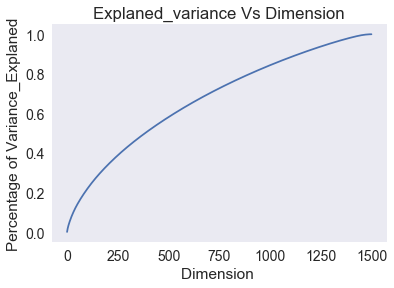

In [294]:
import matplotlib.pyplot as plt
plt.plot(cum_var_explained)
plt.xlabel("Dimension ")
plt.ylabel("Percentage of Variance_Explaned")
plt.title("Explaned_variance Vs Dimension")
plt.grid()
plt.show()

1) As 90 percent of the variance is explaned when the dimension is reduced to 1200 using singular value decomposition of Truncated SVD, so considering 1200 dimensions for Linear SVM application.

#### TrucatedSVD on TFIDF_Essays

In [295]:
from sklearn.decomposition import TruncatedSVD
truncated_svd = TruncatedSVD(n_components= 1200)
truncated_svd.fit(T_train_essay_text_tfidf2)
n_train_truncated_essay = truncated_svd.transform(T_train_essay_text_tfidf2)
n_cv_truncated_essay    = truncated_svd.transform(T_cv_essay_text_tfidf2)
n_test_truncated_essay  = truncated_svd.transform(T_test_essay_text_tfidf2)

In [296]:
print(n_train_truncated_essay.shape)
print(n_cv_truncated_essay.shape)
print(n_test_truncated_essay.shape)

(49041, 1200)
(24155, 1200)
(36052, 1200)


In [297]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
N_train = hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe,X_train_price_norm,X_train_teacher_no_prev_norm,X_train_quantity,Sentiment_X_train_Essays,Word_count_X_train_Essays_titles,n_train_truncated_essay))
N_cv = hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe,X_cv_price_norm,X_cv_teacher_no_prev_norm,X_cv_quantity,Sentiment_X_cv_Essays,Word_count_X_cv_Essays_titles,n_cv_truncated_essay))
N_test = hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe,X_test_price_norm,X_test_teacher_no_prev_norm,X_test_quantity,Sentiment_X_test_Essays,Word_count_X_test_Essays_titles,n_test_truncated_essay))

print(N_train.shape)
print(N_cv.shape)
print(N_test.shape)

(49041, 1308)
(24155, 1308)
(36052, 1308)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>
                <

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>8. Linear SVM</h1>

### 8.1 Applying Linear SVM on BOW,<font color='red'> SET 1</font>

In [109]:
X_train_bow1 = X_train_bow.tocsr()
X_cv_bow1 = X_cv_bow.tocsr()
X_test_bow1 = X_test_bow.tocsr()

### 8.1.1. Linear SVM on BoW using l2 Regularization 

In [151]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_BoW_l2 = []
cv_auc_BoW_l2 = []

K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l2",class_weight = "balanced")
    clf.fit(X_train_bow, y_train)
    

    y_train_pred = clf.decision_function(X_train_bow1)
    
    y_cv_pred = clf.decision_function( X_cv_bow1)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_BoW_l2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_BoW_l2.append(roc_auc_score(y_cv, y_cv_pred))

In [152]:
K = [10**x for x in range(-7,4)]
print(K)

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


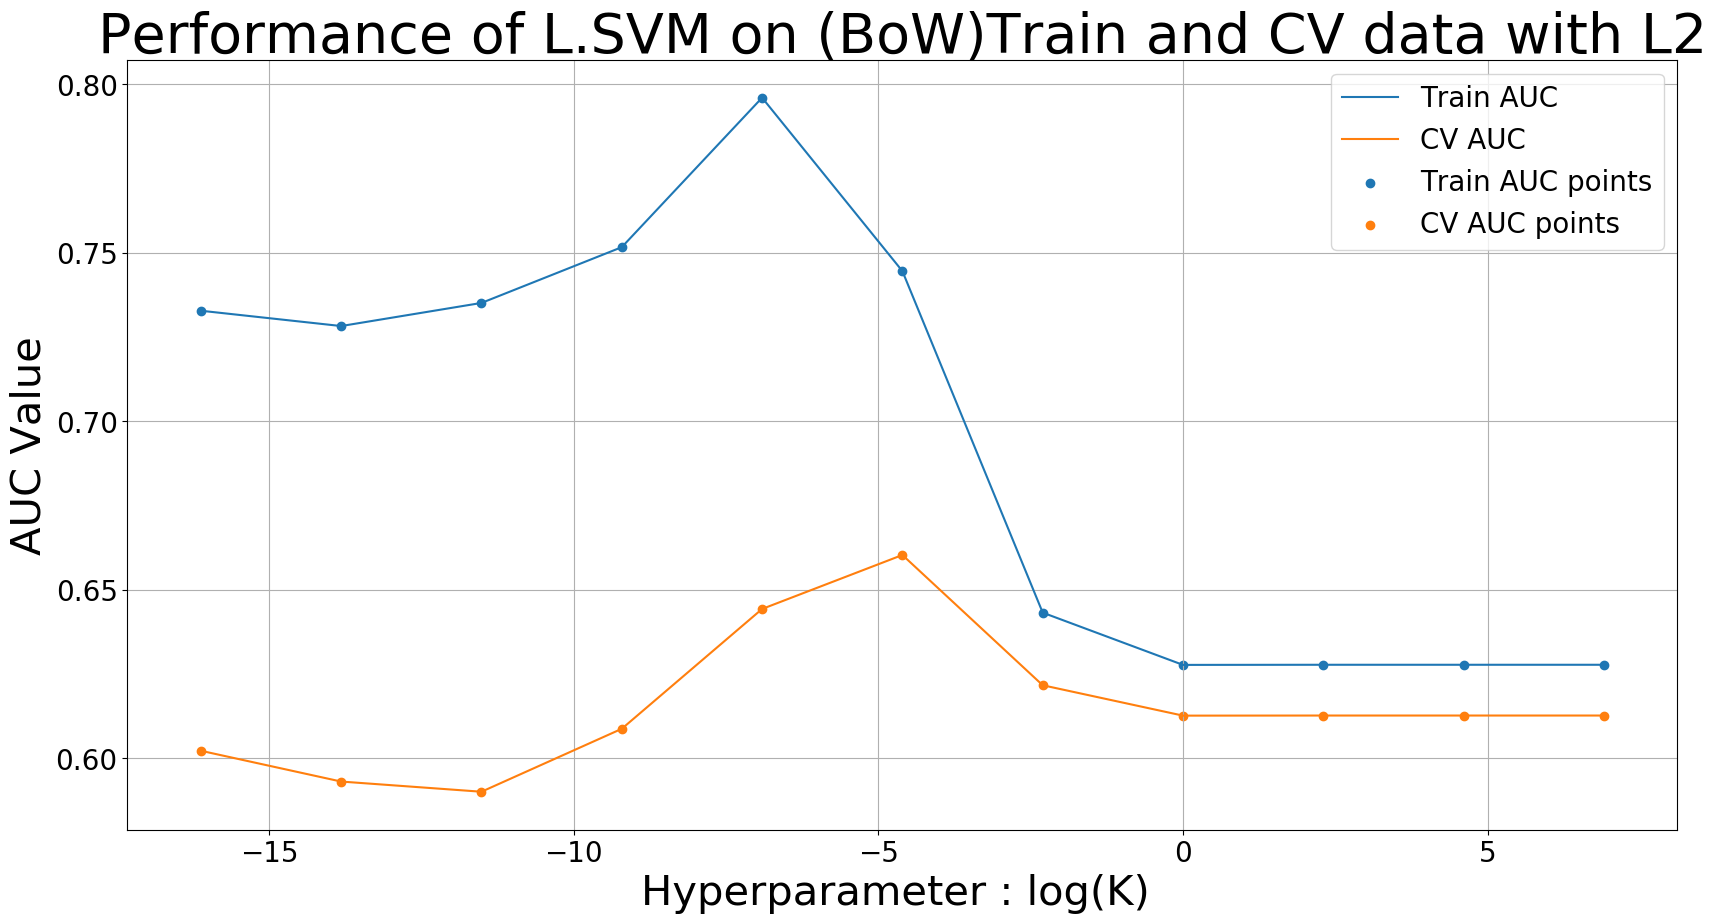

In [153]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_BoW_l2, label='Train AUC')
plt.plot(log_K, cv_auc_BoW_l2, label='CV AUC')

plt.scatter(log_K, train_auc_BoW_l2, label='Train AUC points')
plt.scatter(log_K, cv_auc_BoW_l2, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (BoW)Train and CV data with L2",fontsize=40)
plt.grid()
plt.show()

### 8.1.1. Linear SVM on BoW using l1 Regularization 

In [154]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
"""y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc_BoW_l1 = []
cv_auc_BoW_l1 = []
#splitting for for in intervals between 1e-7,1e-6,1e-5,1e-4 as model is behaving well in these intervals
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l1",class_weight = "balanced")
    clf.fit(X_train_bow, y_train)
    

    y_train_pred = clf.decision_function(X_train_bow1)
    
    y_cv_pred = clf.decision_function( X_cv_bow1)
    
         
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_BoW_l1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_BoW_l1.append(roc_auc_score(y_cv, y_cv_pred))

In [155]:
K = [10**x for x in range(-7,4)]
print(K)

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


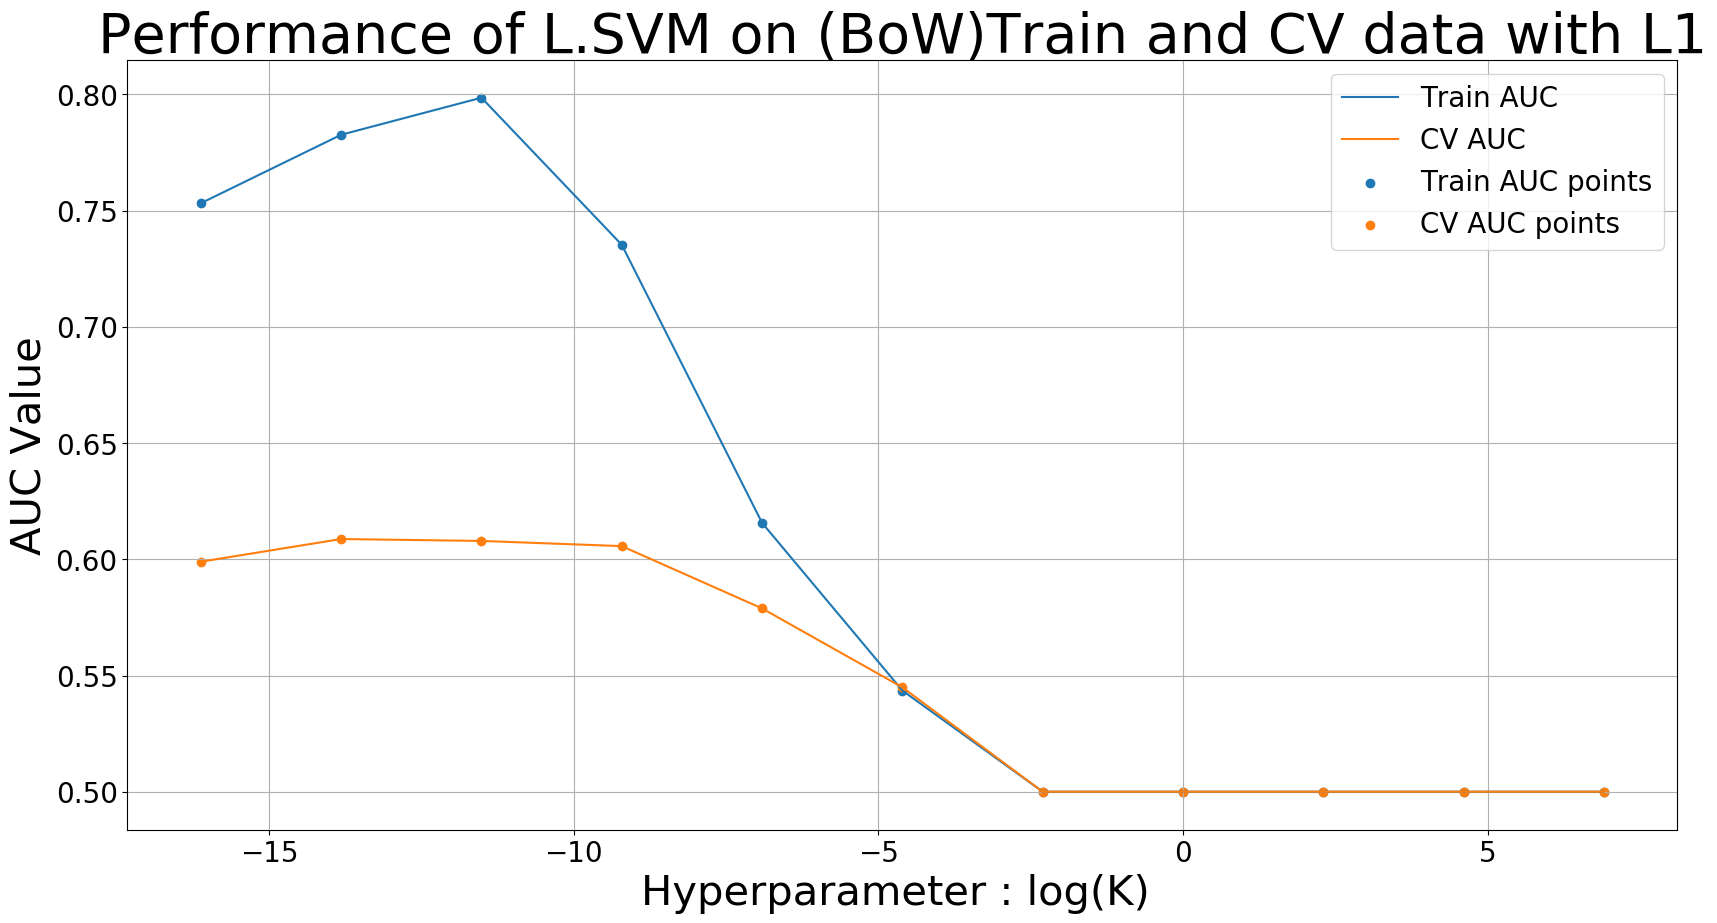

In [156]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_BoW_l1, label='Train AUC')
plt.plot(log_K, cv_auc_BoW_l1, label='CV AUC')

plt.scatter(log_K, train_auc_BoW_l1, label='Train AUC points')
plt.scatter(log_K, cv_auc_BoW_l1, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (BoW)Train and CV data with L1",fontsize=40)
plt.grid()
plt.show()

1) Clearly l2 regularization does better on the CV dataset incomparison to l1 regularization  for BoW preprocessing, as alpha using l1 regularization is around AuC of 0.6 while alpha using l2 does cross 0.65 for certain values.

### Using the Optimal Hyperparameters (Optimal_alpha & l2 Regularization)

In [285]:
best_k_bow = 0.01

In [286]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss = "hinge",alpha = best_k_bow ,penalty="l2",class_weight = "balanced")
clf.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.decision_function(X_train_bow1)    
y_test_pred = clf.decision_function(X_test_bow1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

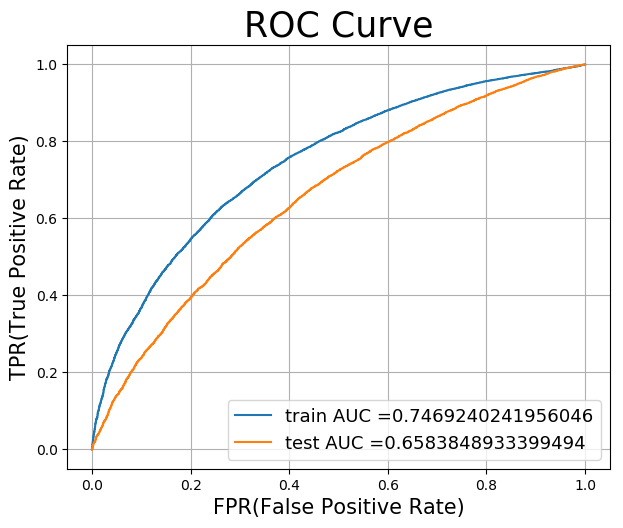

In [287]:
plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

In [288]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.467248173083398 for threshold -0.191


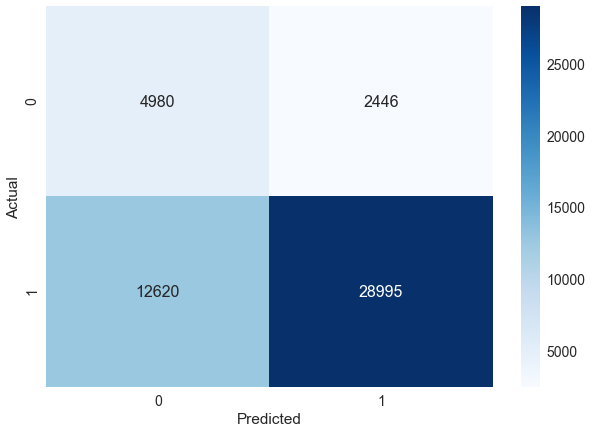

In [289]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.10092326065252774 for threshold -0.17


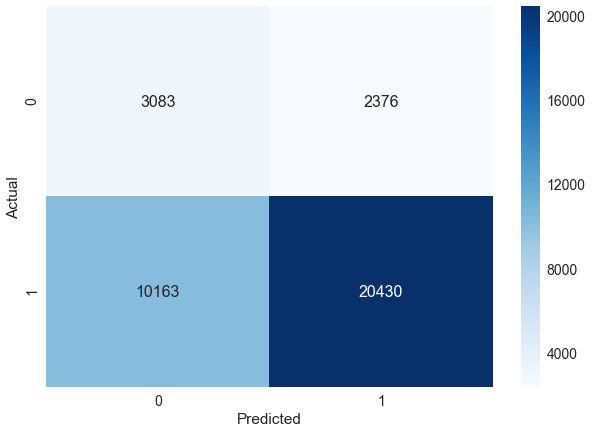

In [290]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, train_tpr, train_fpr) 
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [291]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_tpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.467248173083398 for threshold -0.191
[[ 4980  2446]
 [12620 28995]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.10092326065252774 for threshold -0.17
[[ 3083  2376]
 [10163 20430]]


### 8.2 Applying Linear SVM on TFIDF<font color='red'> SET 2</font>

In [169]:
T_train_tfidf1 = T_train_tfidf.tocsr()
T_cv_tfidf1 = T_cv_tfidf.tocsr()
T_test_tfidf1 = T_test_tfidf.tocsr()

### 8.2.1. Linear SVM on TFIDF using l2 Regularization 

In [170]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_TFIDF_l2 = []
cv_auc_TFIDF_l2 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l2", class_weight = "balanced")
    clf.fit(T_train_tfidf, y_train)
    
    y_train_pred = clf.decision_function(T_train_tfidf1)
    
    y_cv_pred = clf.decision_function( T_cv_tfidf1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_TFIDF_l2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_TFIDF_l2.append(roc_auc_score(y_cv, y_cv_pred))

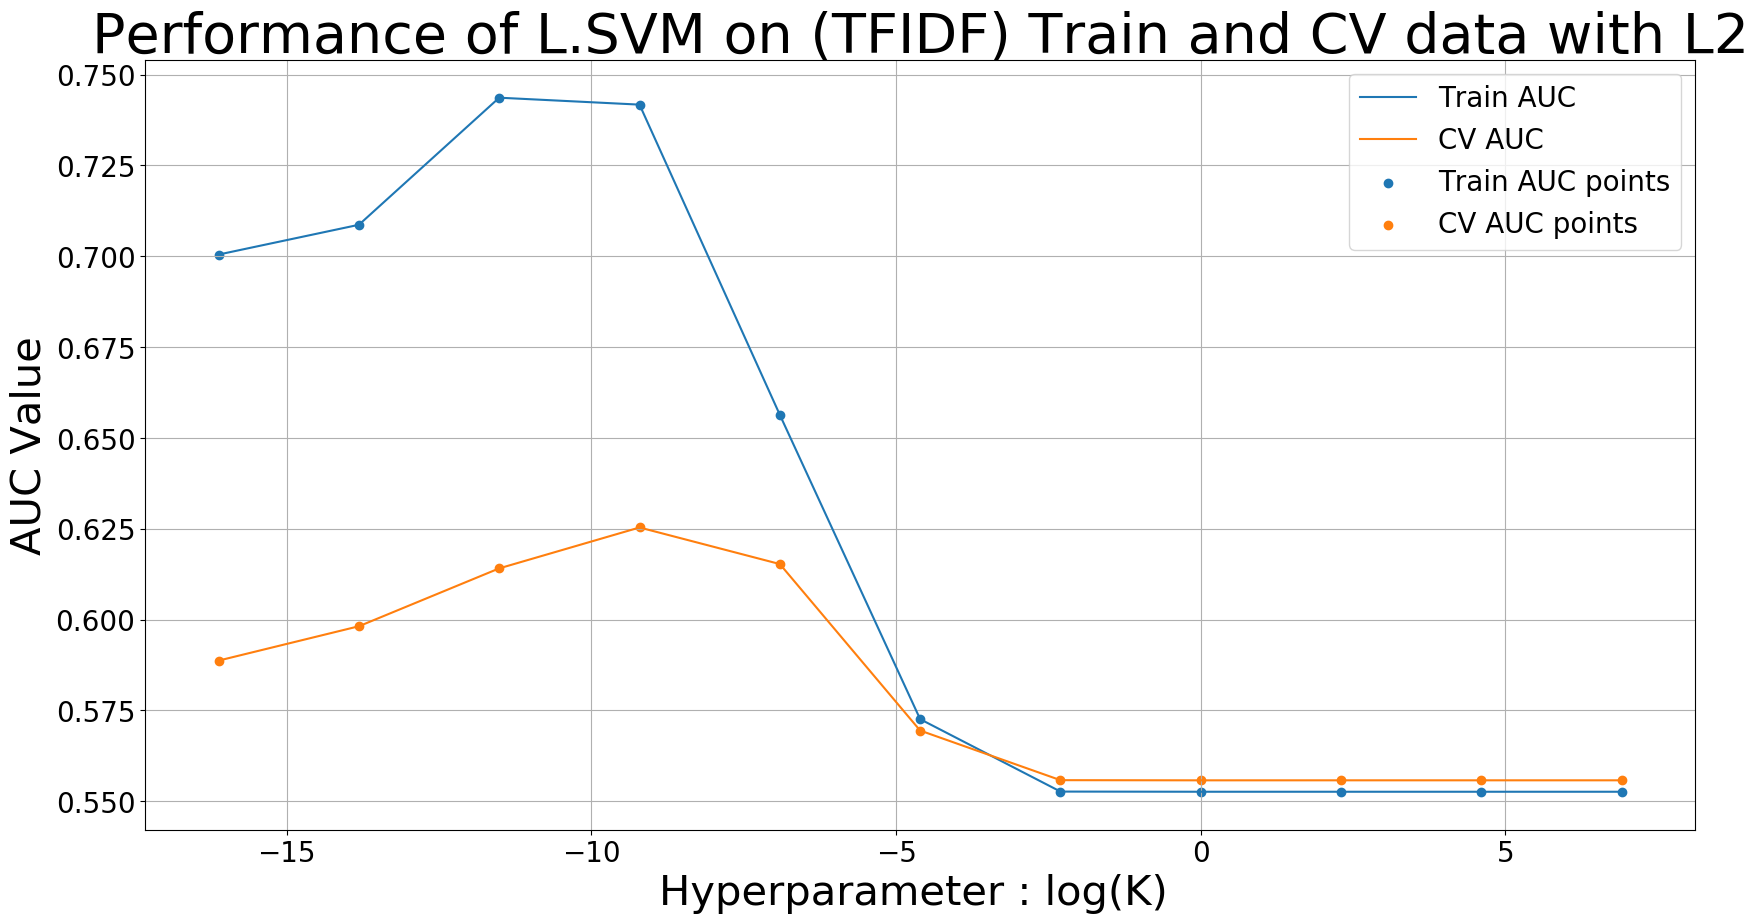

In [171]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_TFIDF_l2, label='Train AUC')
plt.plot(log_K, cv_auc_TFIDF_l2, label='CV AUC')

plt.scatter(log_K, train_auc_TFIDF_l2, label='Train AUC points')
plt.scatter(log_K, cv_auc_TFIDF_l2, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (TFIDF) Train and CV data with L2",fontsize=40)
plt.grid()
plt.show()

### 8.2.2. Linear SVM on TFIDF using l1 Regularization 

In [174]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
train_auc_TFIDF_l1 = []
cv_auc_TFIDF_l1= []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l1",class_weight = "balanced")
    clf.fit(T_train_tfidf, y_train)
    

    y_train_pred = clf.predict(T_train_tfidf1)
    
    y_cv_pred = clf.predict( T_cv_tfidf1)
    
         
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_TFIDF_l1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_TFIDF_l1.append(roc_auc_score(y_cv, y_cv_pred))

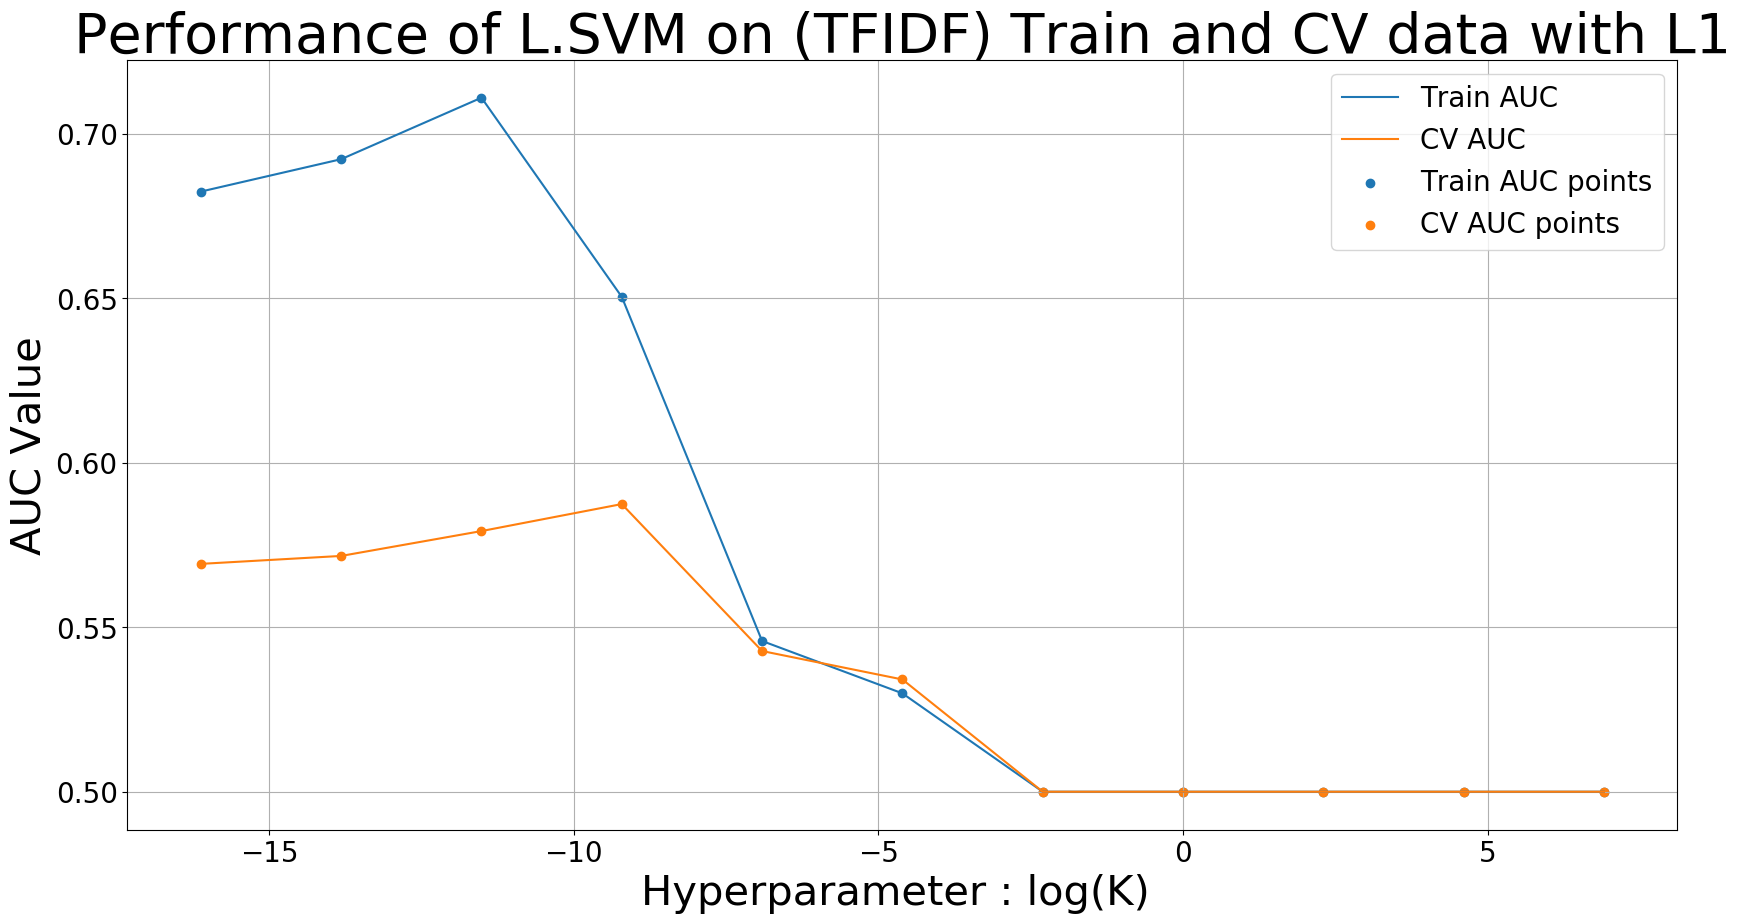

In [175]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_TFIDF_l1, label='Train AUC')
plt.plot(log_K, cv_auc_TFIDF_l1, label='CV AUC')

plt.scatter(log_K, train_auc_TFIDF_l1, label='Train AUC points')
plt.scatter(log_K, cv_auc_TFIDF_l1, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (TFIDF) Train and CV data with L1",fontsize=40)
plt.grid()
plt.show()

1) Clearly l2 regularization does better on the CV dataset incomparison to l1 regularization for TFIDF preprocessing, as the alpha using l1 regularization is bounded by 0.6 while alpha using l2 regularization has a bound which is higher than 0.6 for certain values.

### Using Optimal Hyperparameters (Optimal alpha & l2 Regularization)

In [187]:
best_k_TFIDF = 1e-4

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss = "hinge",alpha = best_k_TFIDF ,penalty="l2",class_weight = "balanced")
clf.fit(T_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.decision_function(T_train_tfidf1)    
y_test_pred = clf.decision_function(T_test_tfidf1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

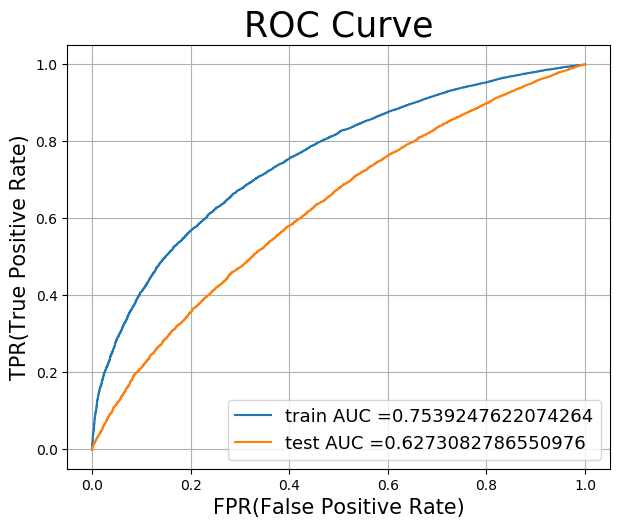

In [189]:
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.47423321374200217 for threshold -0.022


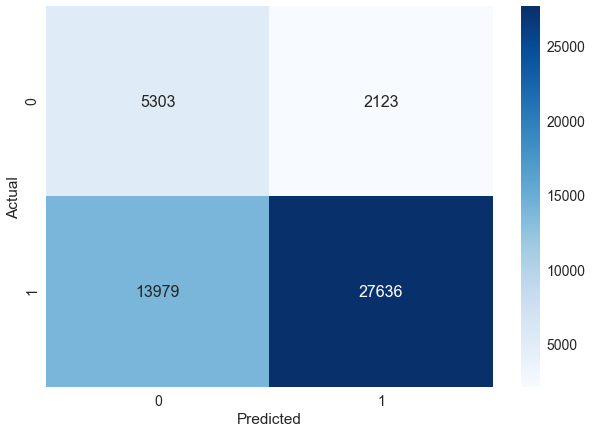

In [190]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.47423321374200217 for threshold -0.022


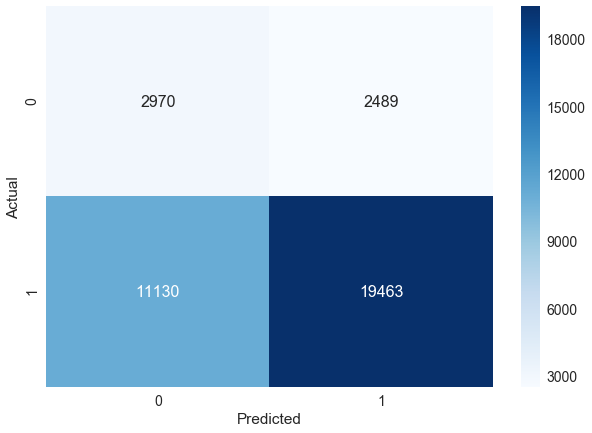

In [191]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [192]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.47423321374200217 for threshold -0.022
[[ 5303  2123]
 [13979 27636]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.47423321374200217 for threshold -0.022
[[ 2970  2489]
 [11130 19463]]


### 8.3 Applying Linear SVM on AVG_W2V<font color='red'> SET 3</font>

In [211]:
A_train_avg_w2v1 = A_train_avg_w2v.tocsr()
A_cv_avg_w2v1 = A_cv_avg_w2v.tocsr()
A_test_avg_w2v1 = A_test_avg_w2v.tocsr()


### 8.2.1. Linear SVM on AVG_W2V using l2 Regularization 

In [212]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_AVG_W2V_l2 = []
cv_auc_AVG_W2V_l2 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l2",class_weight = "balanced")
    clf.fit(A_train_avg_w2v, y_train)
    

    y_train_pred = clf.decision_function(A_train_avg_w2v1)
    
    y_cv_pred = clf.decision_function( A_cv_avg_w2v1)
     # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_AVG_W2V_l2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_AVG_W2V_l2.append(roc_auc_score(y_cv, y_cv_pred))

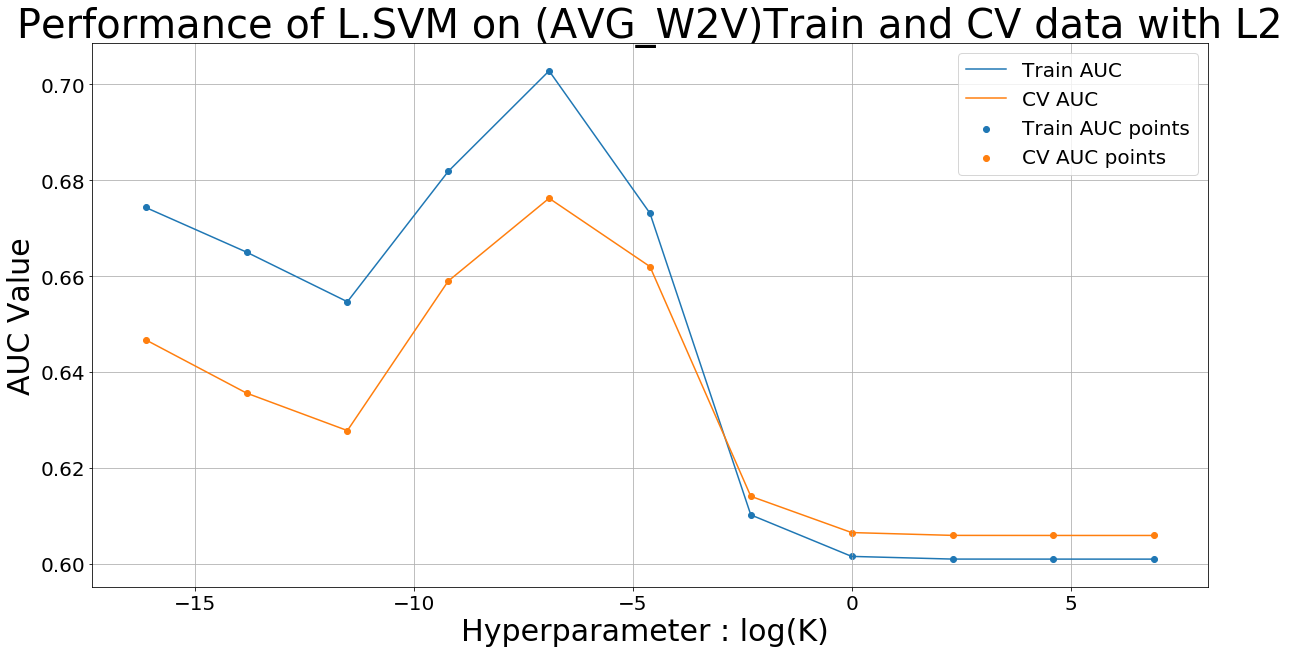

In [213]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_AVG_W2V_l2, label='Train AUC')
plt.plot(log_K, cv_auc_AVG_W2V_l2, label='CV AUC')

plt.scatter(log_K, train_auc_AVG_W2V_l2, label='Train AUC points')
plt.scatter(log_K, cv_auc_AVG_W2V_l2, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (AVG_W2V)Train and CV data with L2",fontsize=40)
plt.grid()
plt.show()

### 8.3.2. Linear SVM on AVG_W2V using l1 Regularization 

In [214]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_AVG_W2V_l1 = []
cv_auc_AVG_W2V_l1 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l1",class_weight = "balanced")
    clf.fit(A_train_avg_w2v, y_train)
    

    y_train_pred = clf.decision_function(A_train_avg_w2v1)
    
    y_cv_pred = clf.decision_function(A_cv_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_AVG_W2V_l1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_AVG_W2V_l1.append(roc_auc_score(y_cv, y_cv_pred))

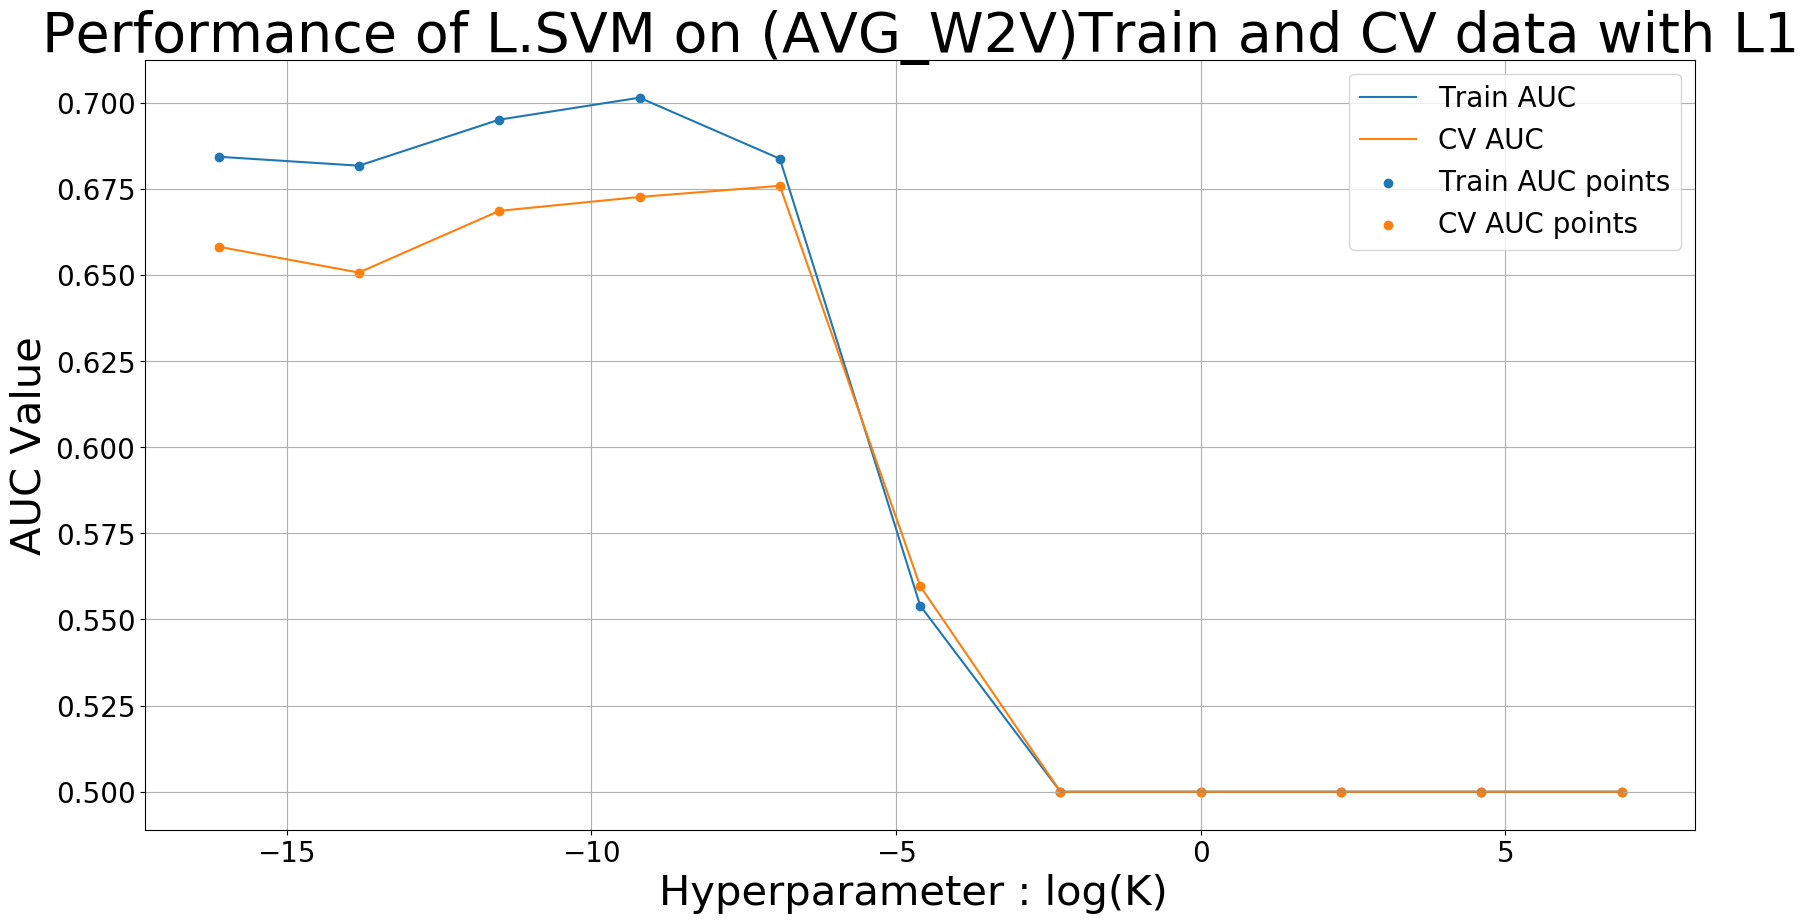

In [215]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_AVG_W2V_l1, label='Train AUC')
plt.plot(log_K, cv_auc_AVG_W2V_l1, label='CV AUC')

plt.scatter(log_K, train_auc_AVG_W2V_l1, label='Train AUC points')
plt.scatter(log_K, cv_auc_AVG_W2V_l1, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (AVG_W2V)Train and CV data with L1",fontsize=40)
plt.grid()
plt.show()

### Using Optimal Hyperparameters (Optimal alpha & l2 Regularization)

In [246]:
best_k_avg_w2v = 1e-3

In [247]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss = "hinge",alpha = best_k_avg_w2v ,penalty="l2",class_weight="balanced")
clf.fit(A_train_avg_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.decision_function(A_train_avg_w2v1)    
y_test_pred = clf.decision_function(A_test_avg_w2v1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

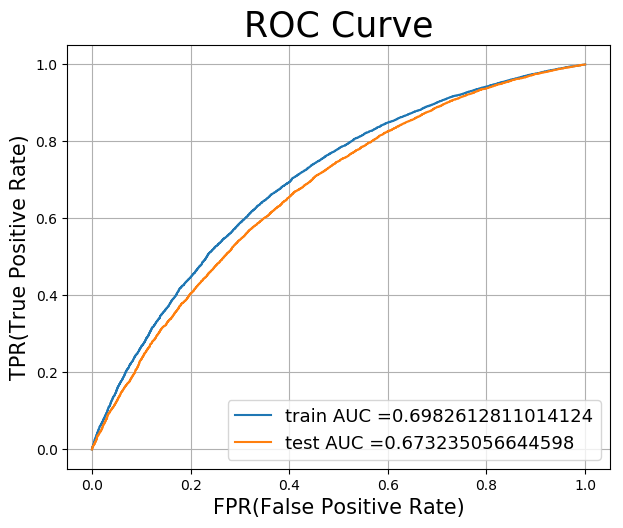

In [248]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4215985160678153 for threshold -0.195


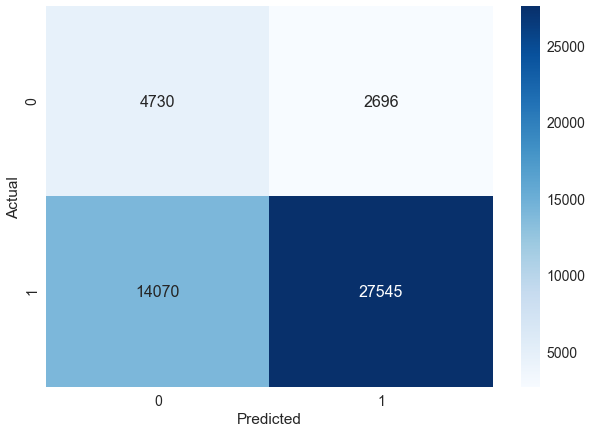

In [249]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4215985160678153 for threshold -0.195


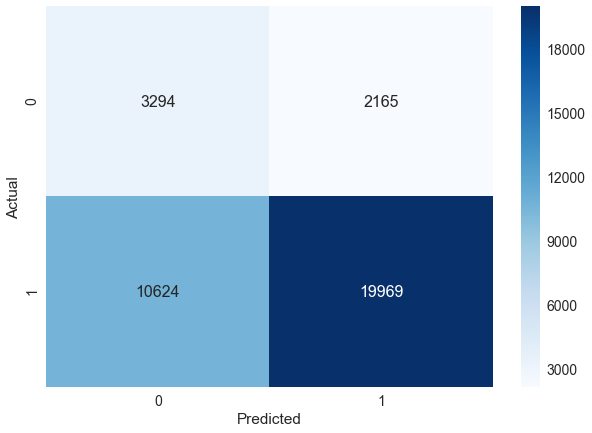

In [250]:
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [251]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4215985160678153 for threshold -0.195
[[ 4730  2696]
 [14070 27545]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4215985160678153 for threshold -0.195
[[ 3294  2165]
 [10624 19969]]


### 8.4 Applying Linear SVM on TFIDF_W2V<font color='red'> SET 4</font>

In [252]:
L_train_Tfidf_avg_w2v1 = L_train_Tfidf_avg_w2v.tocsr()
L_cv_Tfidf_avg_w2v1 = L_cv_Tfidf_avg_w2v.tocsr()
L_test_Tfidf_avg_w2v1 = L_test_Tfidf_avg_w2v.tocsr()

### 8.4.1. Linear SVM on TFIDF_W2V using l2 Regularization 

In [255]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_TFIDF_W2V_l2 = []
cv_auc_TFIDF_W2V_l2 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l2",class_weight="balanced")
    clf.fit(L_train_Tfidf_avg_w2v, y_train)
    

    y_train_pred = clf.decision_function(L_train_Tfidf_avg_w2v1)
    
    y_cv_pred = clf.decision_function( L_cv_Tfidf_avg_w2v1)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_TFIDF_W2V_l2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_TFIDF_W2V_l2.append(roc_auc_score(y_cv, y_cv_pred))

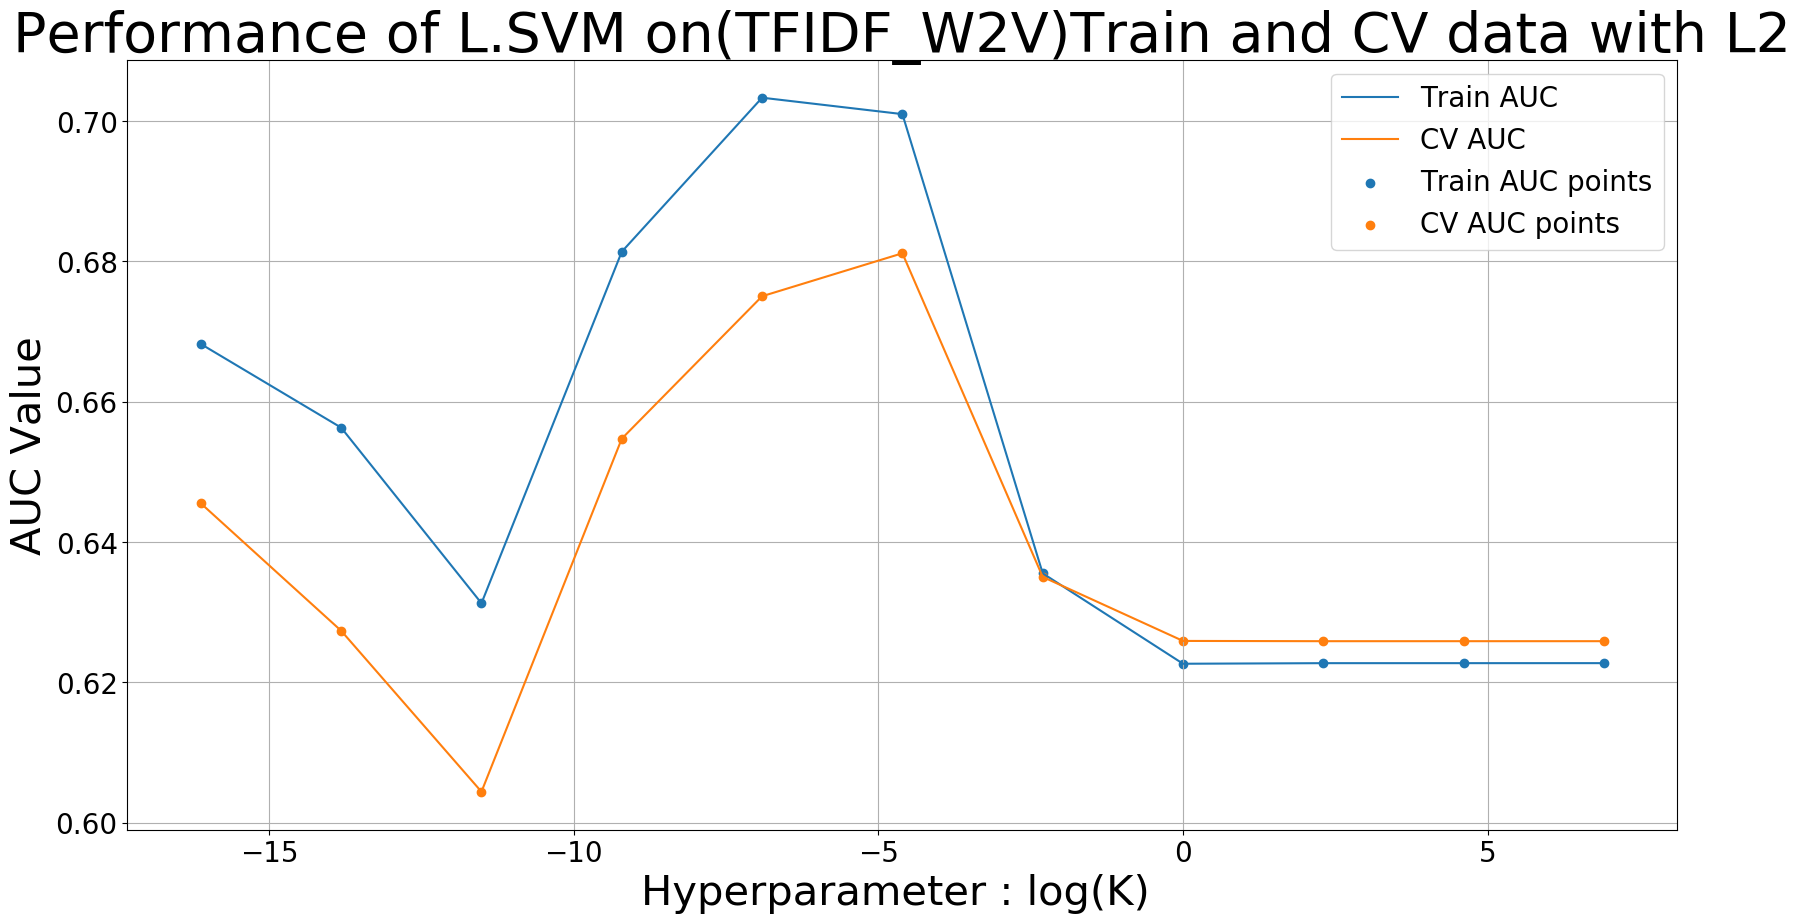

In [256]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_TFIDF_W2V_l2, label='Train AUC')
plt.plot(log_K, cv_auc_TFIDF_W2V_l2, label='CV AUC')

plt.scatter(log_K, train_auc_TFIDF_W2V_l2, label='Train AUC points')
plt.scatter(log_K, cv_auc_TFIDF_W2V_l2, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on(TFIDF_W2V)Train and CV data with L2",fontsize=40)
plt.grid()
plt.show()

### 8.4.2. Linear SVM on TFIDF_W2V using l1 Regularization 

In [257]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_TFIDF_W2V_l1 = []
cv_auc_TFIDF_W2V_l1 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l1",class_weight= "balanced")
    clf.fit(L_train_Tfidf_avg_w2v, y_train)
    

    y_train_pred = clf.decision_function(L_train_Tfidf_avg_w2v1)
    
    y_cv_pred = clf.decision_function( L_cv_Tfidf_avg_w2v1)
    
         
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_TFIDF_W2V_l1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_TFIDF_W2V_l1.append(roc_auc_score(y_cv, y_cv_pred))

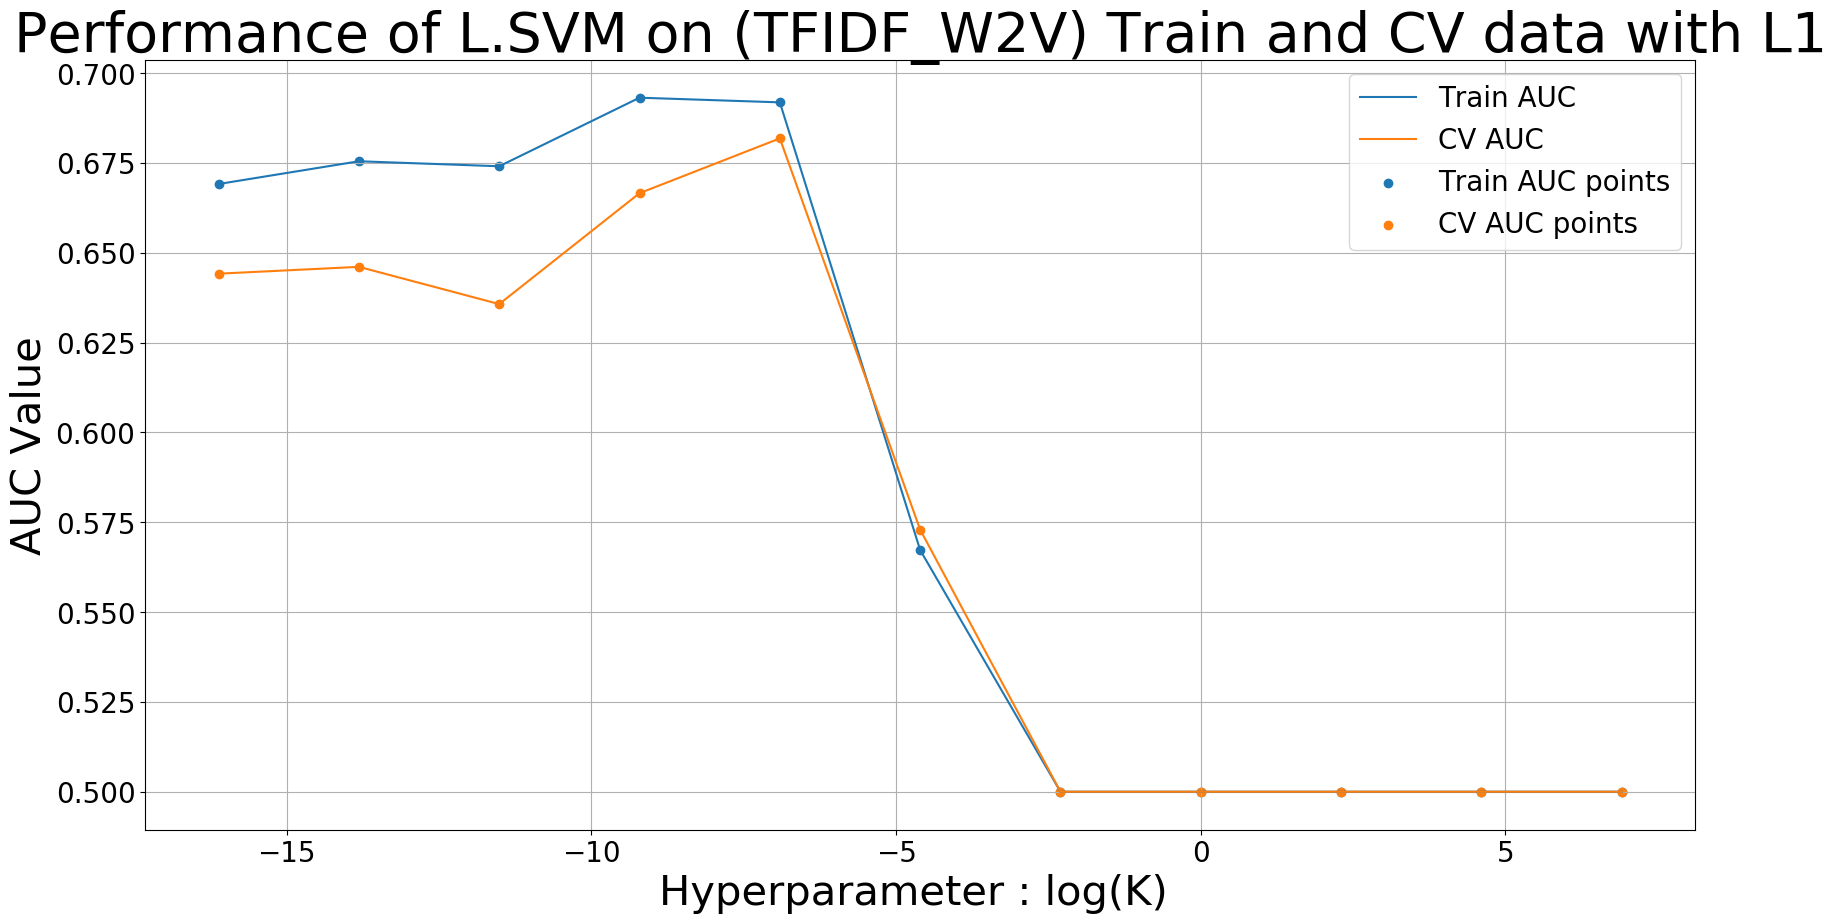

In [258]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_TFIDF_W2V_l1, label='Train AUC')
plt.plot(log_K, cv_auc_TFIDF_W2V_l1, label='CV AUC')

plt.scatter(log_K, train_auc_TFIDF_W2V_l1, label='Train AUC points')
plt.scatter(log_K, cv_auc_TFIDF_W2V_l1, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on (TFIDF_W2V) Train and CV data with L1",fontsize=40)
plt.grid()
plt.show()

### Using Optimal Hyperparameters (optimal_alpha & l2 Regularization)

In [276]:
best_k_TFIDF_W2V = 1e-3

In [277]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss = "hinge",alpha = best_k_TFIDF_W2V ,penalty="l2",class_weight="balanced")
clf.fit(A_train_avg_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.decision_function(A_train_avg_w2v1)    
y_test_pred = clf.decision_function(A_test_avg_w2v1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

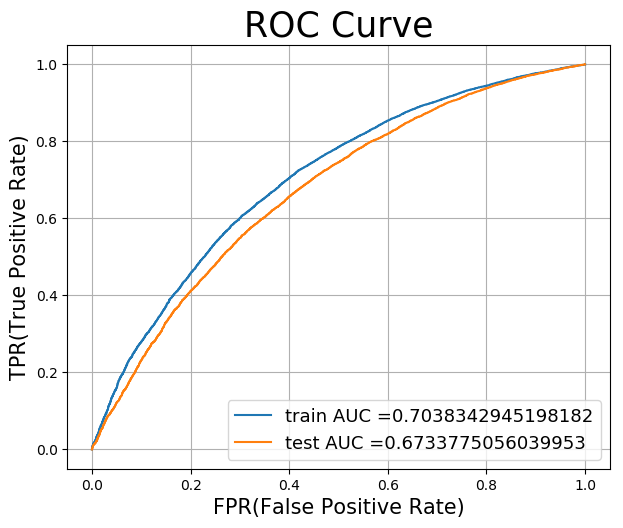

In [278]:

plt.style.use('default')
plt.figure(figsize=(7,5.5))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4254313107477619 for threshold 0.761


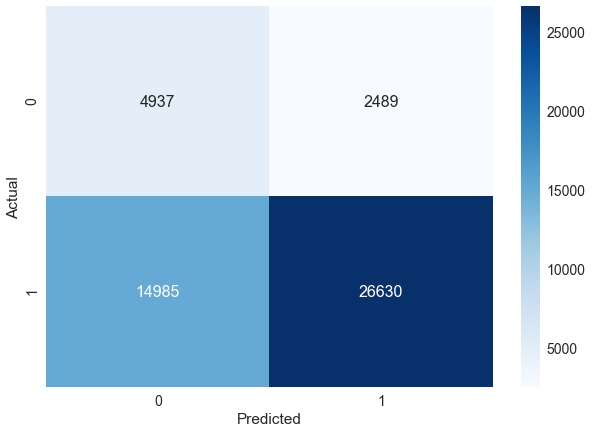

In [279]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.4254313107477619 for threshold 0.761


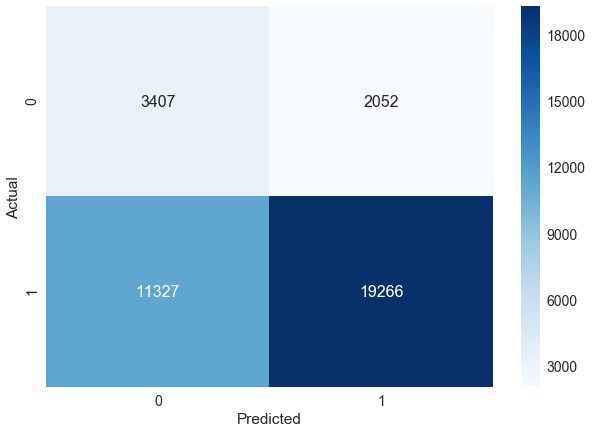

In [280]:
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [281]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4254313107477619 for threshold 0.761
[[ 4937  2489]
 [14985 26630]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4254313107477619 for threshold 0.761
[[ 3407  2052]
 [11327 19266]]


### 8.5 Applying Linear SVM,<font color='red'> SET 5</font>

In [298]:
N_train1 = N_train.tocsr()
N_cv1 = N_cv.tocsr()
N_test1 = N_test.tocsr()

### 8.5.1. Linear SVM on TruncatedSVD(Essays) using l2 Regularization 

In [299]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_Truncated_l2 = []
cv_auc_Truncated_l2 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l2",class_weight="balanced")
    clf.fit(N_train, y_train)
    

    y_train_pred = clf.decision_function(N_train1)
    
    y_cv_pred = clf.decision_function(N_cv1)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_Truncated_l2.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_Truncated_l2.append(roc_auc_score(y_cv, y_cv_pred))

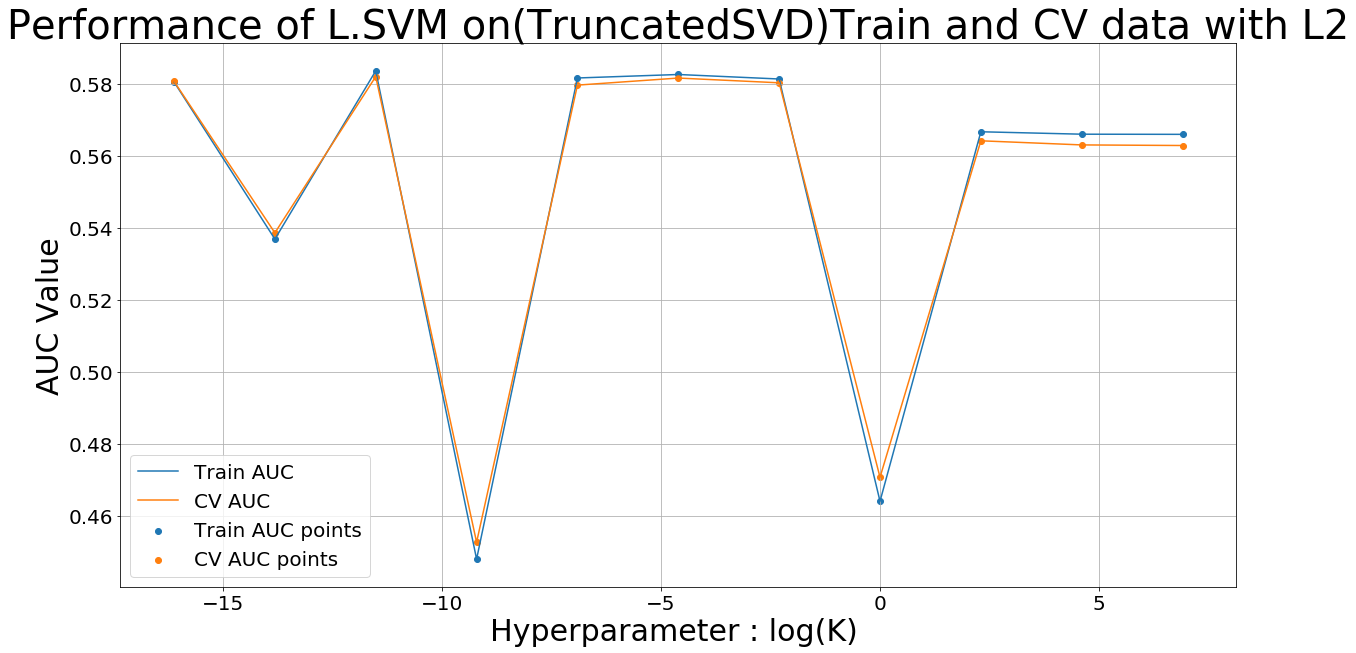

In [300]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_Truncated_l2, label='Train AUC')
plt.plot(log_K, cv_auc_Truncated_l2, label='CV AUC')

plt.scatter(log_K, train_auc_Truncated_l2, label='Train AUC points')
plt.scatter(log_K, cv_auc_Truncated_l2, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on(TruncatedSVD)Train and CV data with L2",fontsize=40)
plt.grid()
plt.show()

### 8.5.2. Linear SVM on TruncatedSVD(Essays) using l1 Regularization 

In [301]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc_Truncated_l1 = []
cv_auc_Truncated_l1 = []
K = [10**x for x in range(-7,4)]
for i in K:
    
    clf = SGDClassifier(loss = "hinge",alpha = i,penalty="l1",class_weight="balanced")
    clf.fit(N_train, y_train)
    

    y_train_pred = clf.decision_function(N_train1)
    
    y_cv_pred = clf.decision_function(N_cv1)
    
         
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc_Truncated_l1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc_Truncated_l1.append(roc_auc_score(y_cv, y_cv_pred))

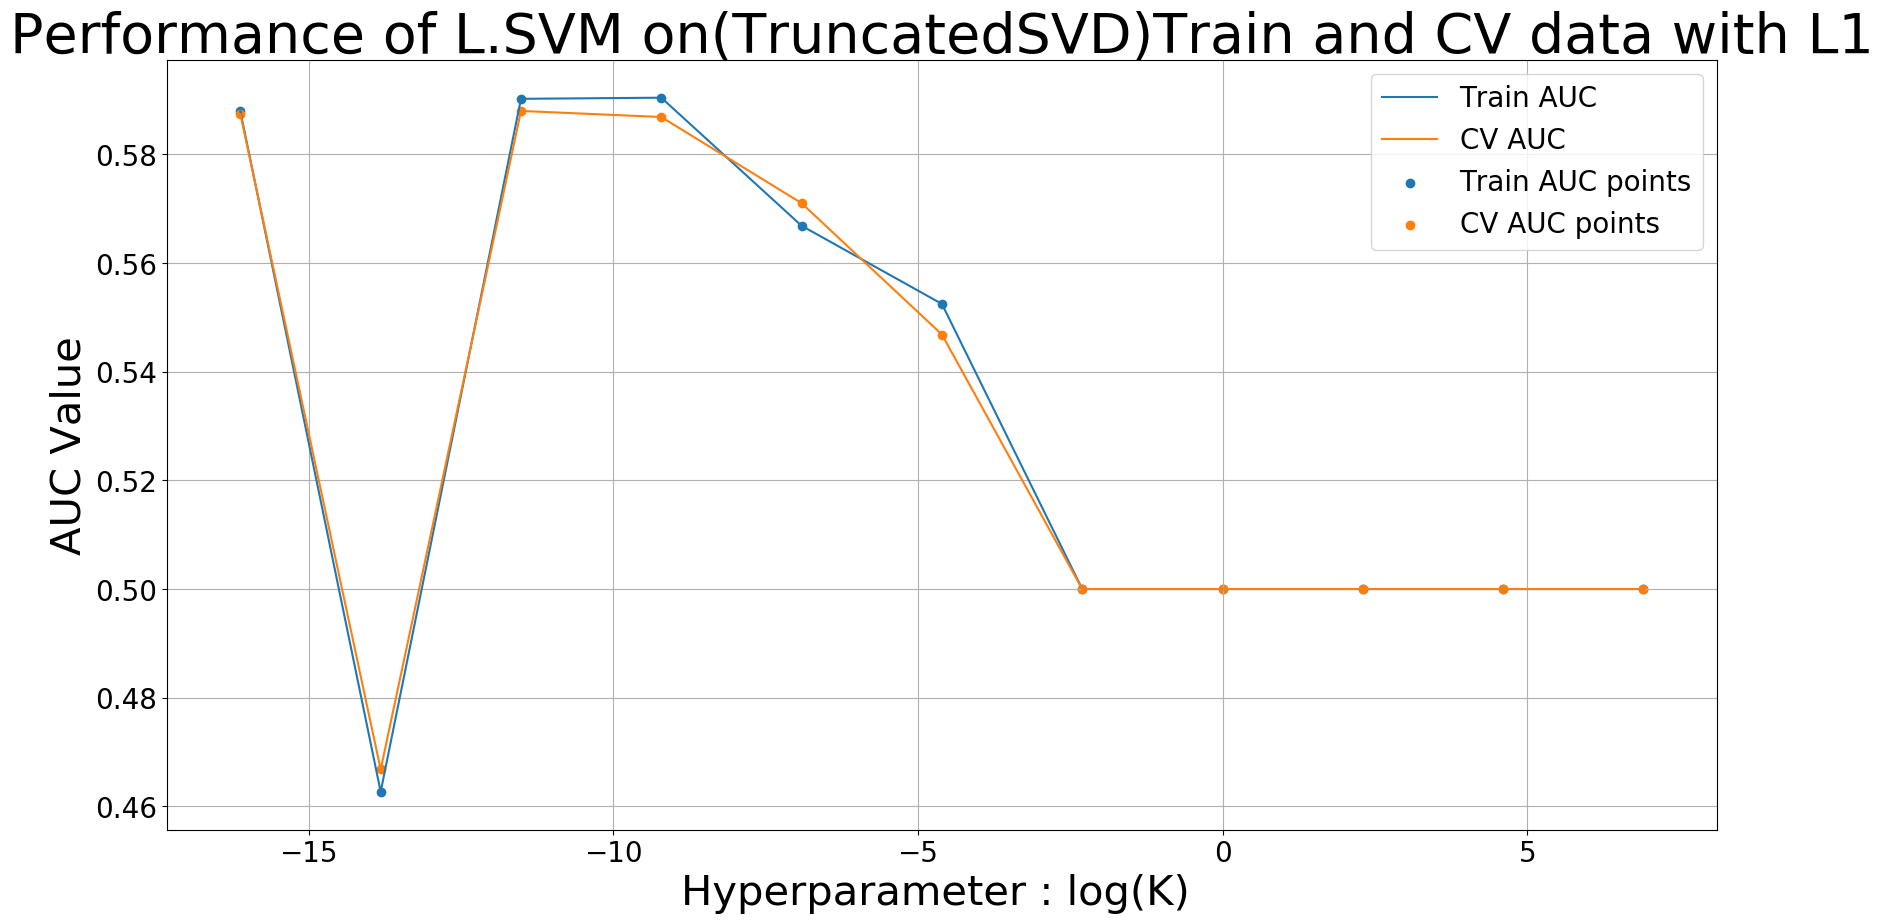

In [302]:
import math
K = [10**x for x in range(-7,4)]
log_K = []
for i in K:
    p = math.log(i)
    log_K.append(p)
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.plot(log_K, train_auc_Truncated_l1, label='Train AUC')
plt.plot(log_K, cv_auc_Truncated_l1, label='CV AUC')

plt.scatter(log_K, train_auc_Truncated_l1, label='Train AUC points')
plt.scatter(log_K, cv_auc_Truncated_l1, label='CV AUC points')
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})
plt.xlabel("Hyperparameter : log(K) ",fontsize = 30)
plt.ylabel("AUC Value",fontsize =30)
plt.title("Performance of L.SVM on(TruncatedSVD)Train and CV data with L1",fontsize=40)
plt.grid()
plt.show()

1) Cealrly, l1 regularization does better than l2 regularization over TruncatedSVD on Essay features

### Using Optimal Hyperparameters( Optimal alpha & l1 Regularization)

In [324]:
best_alpha_Truncated = 1e-4

In [325]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss = "hinge",alpha = best_alpha_Truncated ,penalty="l1",class_weight = "balanced")
clf.fit(N_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.decision_function(N_train1)    
y_test_pred = clf.decision_function(N_test1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

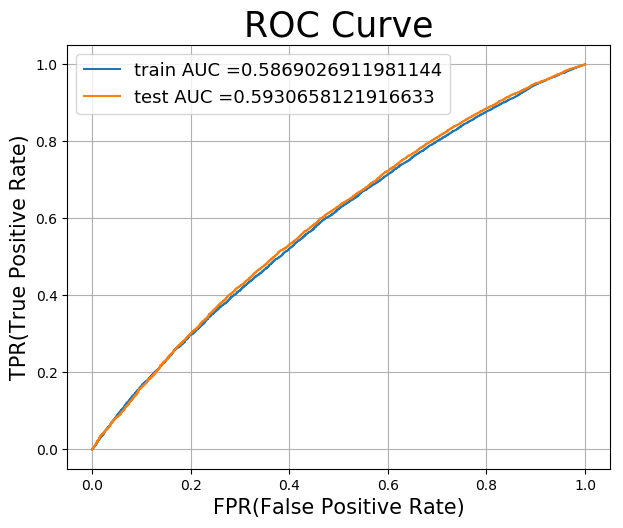

In [326]:
plt.figure(figsize=(7,5.5))
plt.style.use('default')
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend(prop={'size': 13})
plt.xlabel("FPR(False Positive Rate)",fontsize = 15)
plt.ylabel("TPR(True Positive Rate)",fontsize = 15)
plt.title("ROC Curve",fontsize= 25)
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.31688758536750405 for threshold 728.678


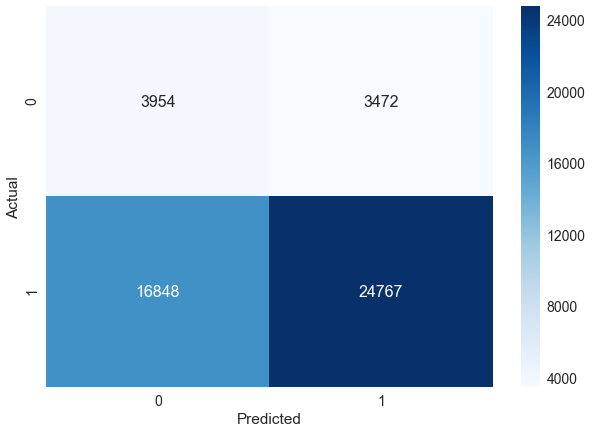

In [327]:
# This code was taken from https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y_train_predicted = predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_train, y_train_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

the maximum value of tpr*(1-fpr) 0.31688758536750405 for threshold 728.678


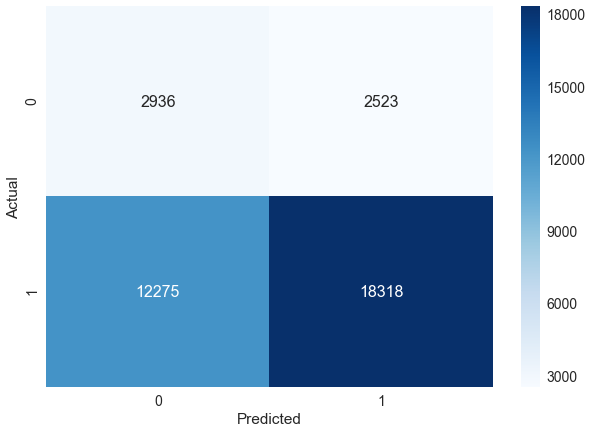

In [328]:
y_test_predicted = predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)
data = confusion_matrix(y_test, y_test_predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train_predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [329]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.31688758536750405 for threshold 728.678
[[ 3954  3472]
 [16848 24767]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.31688758536750405 for threshold 728.678
[[ 2936  2523]
 [12275 18318]]


<h1>9. Conclusions</h1>

In [330]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Type of Vectorizer", "Optimal_Alpha", "Optimal_Regularization","Train_AUC","Test_AUC"]
x.add_row(["BoW", 0.01,"l2",0.7469,0.6583])
x.add_row(["TFIDF", 1e-4,"l2", 0.7539,0.6273])
x.add_row(["AVG W2V",1e-3,"l2", 0.6982, 0.6732])
x.add_row(["TFIDF weighted W2V",1e-3,"l2", 0.7038, 0.6733])
x.add_row(["TruncatedSVD on Essays",1e-4,"l1", 0.5869, 0.5930])

print(x)

+------------------------+---------------+------------------------+-----------+----------+
|   Type of Vectorizer   | Optimal_Alpha | Optimal_Regularization | Train_AUC | Test_AUC |
+------------------------+---------------+------------------------+-----------+----------+
|          BoW           |      0.01     |           l2           |   0.7469  |  0.6583  |
|         TFIDF          |     0.0001    |           l2           |   0.7539  |  0.6273  |
|        AVG W2V         |     0.001     |           l2           |   0.6982  |  0.6732  |
|   TFIDF weighted W2V   |     0.001     |           l2           |   0.7038  |  0.6733  |
| TruncatedSVD on Essays |     0.0001    |           l1           |   0.5869  |  0.593   |
+------------------------+---------------+------------------------+-----------+----------+


1) From the results obtained above, AVG_W2V and TFIDF_W2V have higher test_AUC with 67.3% accuracy implying a better models for predicting decision boundary w.r.t classification values(0 and 1) on a unseen dataset.  

2) The l2 regularizarion has a better performance with boW, TFIDF, AVG_W2V and TFIDF_W2V, while incase of TrunctedSVD on Essay features l2 regularization does a better job.

3) The train and run time are relatively comparable to models like naive bayes, Logistic Regression and Linear Regression but lower than KNN model.

4) From the results above, Test_AuC in case of TruncatedSVD on Essay features was higher than its Train_AuC which is not typically noticed.